На основе датасета из ноутбука проведите анализ данных и постройте зависимости частоты и среднего убытка от какого-либо параметра (за исключением уже выполненных в ноутбуке).

In [118]:
# Загрузка библиотек

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [119]:
df = pd.read_csv('freMPL-R.csv', low_memory=False)

In [120]:
df.head()

,Exposure,LicAge,RecordBeg,RecordEnd,VehAge,Gender,MariStat,SocioCateg,VehUsage,DrivAge,...,ClaimInd,Dataset,DeducType,ClaimNbResp,ClaimNbNonResp,ClaimNbParking,ClaimNbFireTheft,ClaimNbWindscreen,OutUseNb,RiskArea
0,0.583,366,2004-06-01,NaN,2,Female,Other,CSP1,Professional,55,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.200,187,2004-10-19,NaN,0,Male,Alone,CSP55,Private+trip to office,34,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.083,169,2004-07-16,2004-08-16,1,Female,Other,CSP1,Professional,33,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.375,170,2004-08-16,NaN,1,Female,Other,CSP1,Professional,34,...,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.500,224,2004-01-01,2004-07-01,3,Male,Other,CSP47,Professional,53,...,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343080 entries, 0 to 343079
Data columns (total 31 columns):
Exposure             343080 non-null float64
LicAge               343080 non-null int64
RecordBeg            343080 non-null object
RecordEnd            181115 non-null object
VehAge               177880 non-null object
Gender               343080 non-null object
MariStat             343080 non-null object
SocioCateg           343080 non-null object
VehUsage             343080 non-null object
DrivAge              343080 non-null int64
HasKmLimit           343080 non-null int64
BonusMalus           343080 non-null int64
VehBody              145780 non-null object
VehPrice             145780 non-null object
VehEngine            145780 non-null object
VehEnergy            145780 non-null object
VehMaxSpeed          145780 non-null object
VehClass             145780 non-null object
ClaimAmount          343080 non-null float64
RiskVar              145780 non-null float64
Garage    

In [122]:
df['PolicyCount'] = 1
df['ClaimCount'] = df['ClaimAmount'] > 0
df['NoClaimCount'] = df.PolicyCount - df.ClaimCount

In [123]:
df_group_age = df[['Exposure', 'PolicyCount','ClaimAmount', 'ClaimCount', 'NoClaimCount']].groupby(df['DrivAge']).sum()
df_group_age = df_group_age.reset_index()

In [124]:
df_group_age['Freq'] = df_group_age.ClaimCount / df_group_age.Exposure
df_group_age['AvgClaim'] = df_group_age.ClaimAmount / df_group_age.ClaimCount

# Описание датасета

 - Exposure - срок действия договора страхования в отчетном периоде
 - LicAge - водительский стаж
 - RecordBeg - дата начала действия страхового договора - текущий год
 - RecordEnd - дата окончания действия страхового договора в текущем году
 - Gender - пол водителя
 - MariStat - семейное положение
 - SocioCateg - социальная категория
 - VehUsage - цель использования транспортного средства 
 - DrivAge - возраст водителя
 - HasKmLimit - наличие/отстутсвие лимита по киллометражу
 - BonusMalus - бонусные баллы от 50 до 272
 - ClaimAmount - сумма страховго возмещения
 - RiskVar - оценка риска по 20-балльной шкале
 - ClaimInd - наличие/ отсутствие страховых случаев
 - ClaimNbResp - оценка ClaimNbResp по 5-балльной шкале (0-5)
 - ClaimNbNonResp - оценка ClaimNbNonResp по 7-балльной шкале (0-7)
 - ClaimNbParking - оценка ClaimNbParking (парковка) по 5-балльной шкале (0-5)
 - ClaimNbFireTheft оценка ClaimNbFireTheft (пожар, воровство) по 4-балльной шкале (0-4)
 - ClaimNbWindscreen оценка ClaimNbWindscreen (ветровое стекло) по 8-балльной шкале (0-8)
 - OutUseNb оценка OutUseNb по 5-балльной шкале (0-5)
 - RiskArea - оценка RiskArea по 13-балльной шкале (1-13)

In [125]:
df_group_age.head()

,DrivAge,Exposure,PolicyCount,ClaimAmount,ClaimCount,NoClaimCount,Freq,AvgClaim
0,18,9.084,27,12292.549003,5.0,22,0.550418,2458.509801
1,19,53.911,111,48707.688640,17.0,94,0.315335,2865.158155
2,20,266.108,594,235641.194471,56.0,538,0.210441,4207.878473
3,21,510.779,1257,207896.202145,113.0,1144,0.221231,1839.789400
4,22,870.498,2006,443829.234169,193.0,1813,0.221712,2299.633338


В ноутбуке уже есть зависимости от:
    - возраста
    - стажа
    - пола
    - пола и возраста
    - семейного статуса
    - пола, семейного статуса и возраста
    - социального статуса

In [126]:
already_analyze_features = ['LicAge', 'Gender', 'MariStat', 'SocioCateg', 'DrivAge']

In [127]:
def check_missing_values(df):
    columns = df.columns.values.tolist()
    for n in columns:
        if df[n].isna().sum() > 0:
            print(f"столбец '{n}' -  пропусков в столбце: {df[n].isna().sum()}")

In [128]:
check_missing_values(df)

столбец 'RecordEnd' -  пропусков в столбце: 161965
столбец 'VehAge' -  пропусков в столбце: 165200
столбец 'VehBody' -  пропусков в столбце: 197300
столбец 'VehPrice' -  пропусков в столбце: 197300
столбец 'VehEngine' -  пропусков в столбце: 197300
столбец 'VehEnergy' -  пропусков в столбце: 197300
столбец 'VehMaxSpeed' -  пропусков в столбце: 197300
столбец 'VehClass' -  пропусков в столбце: 197300
столбец 'RiskVar' -  пропусков в столбце: 197300
столбец 'Garage' -  пропусков в столбце: 197300
столбец 'DeducType' -  пропусков в столбце: 276190
столбец 'ClaimNbResp' -  пропусков в столбце: 145780
столбец 'ClaimNbNonResp' -  пропусков в столбце: 145780
столбец 'ClaimNbParking' -  пропусков в столбце: 145780
столбец 'ClaimNbFireTheft' -  пропусков в столбце: 145780
столбец 'ClaimNbWindscreen' -  пропусков в столбце: 145780
столбец 'OutUseNb' -  пропусков в столбце: 145780
столбец 'RiskArea' -  пропусков в столбце: 145780


Всего 343080 заполненнных строк. Кол-во пропусков представлено выше. 

In [129]:
columns = df.columns.values.tolist

In [130]:
columns()

['Exposure',
 'LicAge',
 'RecordBeg',
 'RecordEnd',
 'VehAge',
 'Gender',
 'MariStat',
 'SocioCateg',
 'VehUsage',
 'DrivAge',
 'HasKmLimit',
 'BonusMalus',
 'VehBody',
 'VehPrice',
 'VehEngine',
 'VehEnergy',
 'VehMaxSpeed',
 'VehClass',
 'ClaimAmount',
 'RiskVar',
 'Garage',
 'ClaimInd',
 'Dataset',
 'DeducType',
 'ClaimNbResp',
 'ClaimNbNonResp',
 'ClaimNbParking',
 'ClaimNbFireTheft',
 'ClaimNbWindscreen',
 'OutUseNb',
 'RiskArea',
 'PolicyCount',
 'ClaimCount',
 'NoClaimCount']

In [131]:
df['Exposure']

0         0.583
1         0.200
2         0.083
3         0.375
4         0.500
          ...  
343075    0.217
343076    0.225
343077    0.510
343078    0.833
343079    0.344
Name: Exposure, Length: 343080, dtype: float64

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343080 entries, 0 to 343079
Data columns (total 34 columns):
Exposure             343080 non-null float64
LicAge               343080 non-null int64
RecordBeg            343080 non-null object
RecordEnd            181115 non-null object
VehAge               177880 non-null object
Gender               343080 non-null object
MariStat             343080 non-null object
SocioCateg           343080 non-null object
VehUsage             343080 non-null object
DrivAge              343080 non-null int64
HasKmLimit           343080 non-null int64
BonusMalus           343080 non-null int64
VehBody              145780 non-null object
VehPrice             145780 non-null object
VehEngine            145780 non-null object
VehEnergy            145780 non-null object
VehMaxSpeed          145780 non-null object
VehClass             145780 non-null object
ClaimAmount          343080 non-null float64
RiskVar              145780 non-null float64
Garage    

In [133]:
df.describe()

,Exposure,LicAge,DrivAge,HasKmLimit,BonusMalus,ClaimAmount,RiskVar,ClaimInd,Dataset,ClaimNbResp,ClaimNbNonResp,ClaimNbParking,ClaimNbFireTheft,ClaimNbWindscreen,OutUseNb,RiskArea,PolicyCount,NoClaimCount
count,343080.000000,343080.000000,343080.000000,343080.000000,343080.000000,343080.000000,145780.000000,343080.000000,343080.000000,197300.000000,197300.000000,197300.000000,197300.000000,197300.000000,197300.000000,197300.000000,343080.0,343080.000000
mean,0.441275,308.736207,47.164877,0.111892,62.221590,137.777661,13.322116,0.065775,5.344380,0.260765,0.313670,0.075256,0.072935,0.376751,0.256351,7.470066,1.0,0.934225
std,0.288110,161.621869,15.004335,0.315234,17.466711,2401.187133,4.694893,0.247888,2.835647,0.526573,0.594327,0.288666,0.281266,0.651912,0.700462,2.427215,0.0,0.247888
min,0.001000,0.000000,18.000000,0.000000,50.000000,-3407.700000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,0.000000
25%,0.183000,172.000000,35.000000,0.000000,50.000000,0.000000,11.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,1.0,1.000000
50%,0.416000,297.000000,46.000000,0.000000,50.000000,0.000000,15.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.0,1.000000
75%,0.666000,431.000000,58.000000,0.000000,72.000000,0.000000,17.000000,0.000000,8.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,10.000000,1.0,1.000000
max,1.000000,940.000000,103.000000,1.000000,272.000000,802620.270997,20.000000,1.000000,10.000000,5.000000,7.000000,5.000000,4.000000,8.000000,5.000000,13.000000,1.0,1.000000


In [134]:
TIME_features = ['RecordBeg', 'RecordEnd']

In [135]:
#Количественные признаки

In [136]:
NUMERICAL_FEATURE_NAMES = df[columns()].select_dtypes(include=[np.number]).columns.to_list()

In [137]:
NUMERICAL_FEATURE_NAMES

['Exposure',
 'LicAge',
 'DrivAge',
 'HasKmLimit',
 'BonusMalus',
 'ClaimAmount',
 'RiskVar',
 'ClaimInd',
 'Dataset',
 'ClaimNbResp',
 'ClaimNbNonResp',
 'ClaimNbParking',
 'ClaimNbFireTheft',
 'ClaimNbWindscreen',
 'OutUseNb',
 'RiskArea',
 'PolicyCount',
 'NoClaimCount']

удалим пересечение уже разобранных признаков и тех признаков, которые еще предстоит разобрать

In [138]:
for feature in NUMERICAL_FEATURE_NAMES:
    if feature in NUMERICAL_FEATURE_NAMES and feature in already_analyze_features:
        NUMERICAL_FEATURE_NAMES.remove(feature)

In [139]:
NUMERICAL_FEATURE_NAMES

['Exposure',
 'DrivAge',
 'HasKmLimit',
 'BonusMalus',
 'ClaimAmount',
 'RiskVar',
 'ClaimInd',
 'Dataset',
 'ClaimNbResp',
 'ClaimNbNonResp',
 'ClaimNbParking',
 'ClaimNbFireTheft',
 'ClaimNbWindscreen',
 'OutUseNb',
 'RiskArea',
 'PolicyCount',
 'NoClaimCount']

In [140]:
#категориальные признаки

In [141]:
CAT_FEATURE_NAMES = df[columns()].select_dtypes(include=[np.object]).columns.to_list()
df[CAT_FEATURE_NAMES].head()

,RecordBeg,RecordEnd,VehAge,Gender,MariStat,SocioCateg,VehUsage,VehBody,VehPrice,VehEngine,VehEnergy,VehMaxSpeed,VehClass,Garage,DeducType
0,2004-06-01,NaN,2,Female,Other,CSP1,Professional,sedan,D,injection,regular,160-170 km/h,B,None,NaN
1,2004-10-19,NaN,0,Male,Alone,CSP55,Private+trip to office,microvan,K,direct injection overpowered,diesel,170-180 km/h,M1,None,NaN
2,2004-07-16,2004-08-16,1,Female,Other,CSP1,Professional,other microvan,L,direct injection overpowered,diesel,170-180 km/h,M1,None,NaN
3,2004-08-16,NaN,1,Female,Other,CSP1,Professional,other microvan,L,direct injection overpowered,diesel,170-180 km/h,M1,Private garage,NaN
4,2004-01-01,2004-07-01,3,Male,Other,CSP47,Professional,van,L,direct injection overpowered,diesel,140-150 km/h,0,None,NaN


In [142]:
# удаляем те, которые попали во времянные и количественные. 

In [143]:
for feature in CAT_FEATURE_NAMES:
    if feature in CAT_FEATURE_NAMES and feature in already_analyze_features:
        CAT_FEATURE_NAMES.remove(feature)
    elif feature in CAT_FEATURE_NAMES and feature in TIME_features:
        CAT_FEATURE_NAMES.remove(feature)

In [150]:
CAT_FEATURE_NAMES

['RecordEnd',
 'VehAge',
 'MariStat',
 'VehUsage',
 'VehBody',
 'VehPrice',
 'VehEngine',
 'VehEnergy',
 'VehMaxSpeed',
 'VehClass',
 'Garage',
 'DeducType']

In [151]:
CAT_FEATURE_NAMES.remove('RecordEnd')

In [152]:
CAT_FEATURE_NAMES.remove('MariStat')

In [153]:
#Алгоритм анализа прост: берем за основу тот пример, который показали на уроке, создаем списки из анализируемых переменных, в цикле рисуем каждый график по этой переменной. 

In [171]:
def plot_feature(df, feature): 
    fig, axes = plt.subplots(4, 1, figsize=(20, 22))
    
    df_group_var = df[['Exposure', 'PolicyCount','ClaimAmount', 'ClaimCount', 'NoClaimCount']].groupby(df[feature]).sum()
    df_group_var = df_group_var.reset_index()

    df_group_var['Freq'] = df_group_var.ClaimCount / df_group_var.Exposure
    df_group_var['AvgClaim'] = df_group_var.ClaimAmount / df_group_var.ClaimCount 
        
    sns.barplot(x=df_group_var[feature], y=df_group_var['PolicyCount'], palette="magma", ax=axes[0])
    sns.barplot(x=df_group_var[feature], y=df_group_var['NoClaimCount'], palette="magma", ax=axes[1])
    sns.barplot(x=df_group_var[feature], y=df_group_var['ClaimCount'], color='fuchsia', ax=axes[1])           
    sns.barplot(x=df_group_var[feature], y=df_group_var['Freq'], palette="magma", ax=axes[2])
    sns.barplot(x=df_group_var[feature], y=df_group_var['AvgClaim'], palette="magma", ax=axes[3])     
        
    fig.suptitle(f'Анализ признака {feature}', fontsize=18)
    axes[0].set_title(f'Распределение числа полисов по {feature}', size=14)
    axes[1].set_title(f'Распределение числа полисов с убытками и без убытков по {feature}', size=14)
    axes[2].set_title(f'Зависимость частоты убытков от {feature}', size=14)
    axes[3].set_title(f'Зависимость среднего убытка от {feature}', size=14)
    print('\n')
    plt.show()
    print('\n')

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

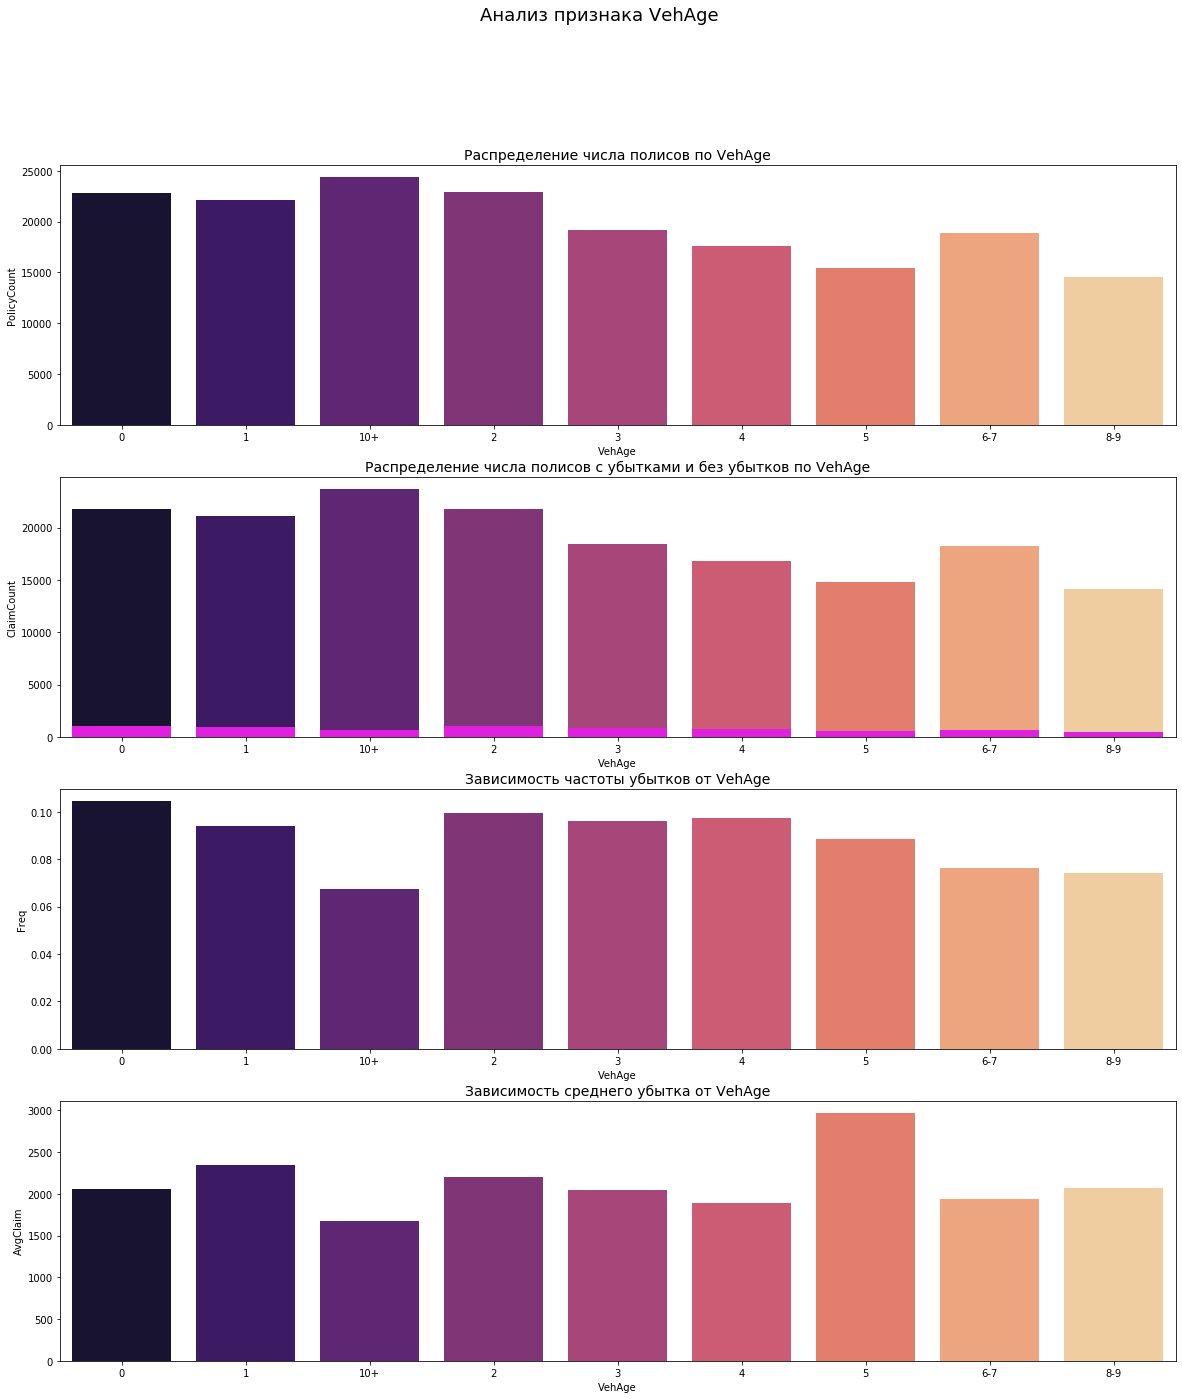

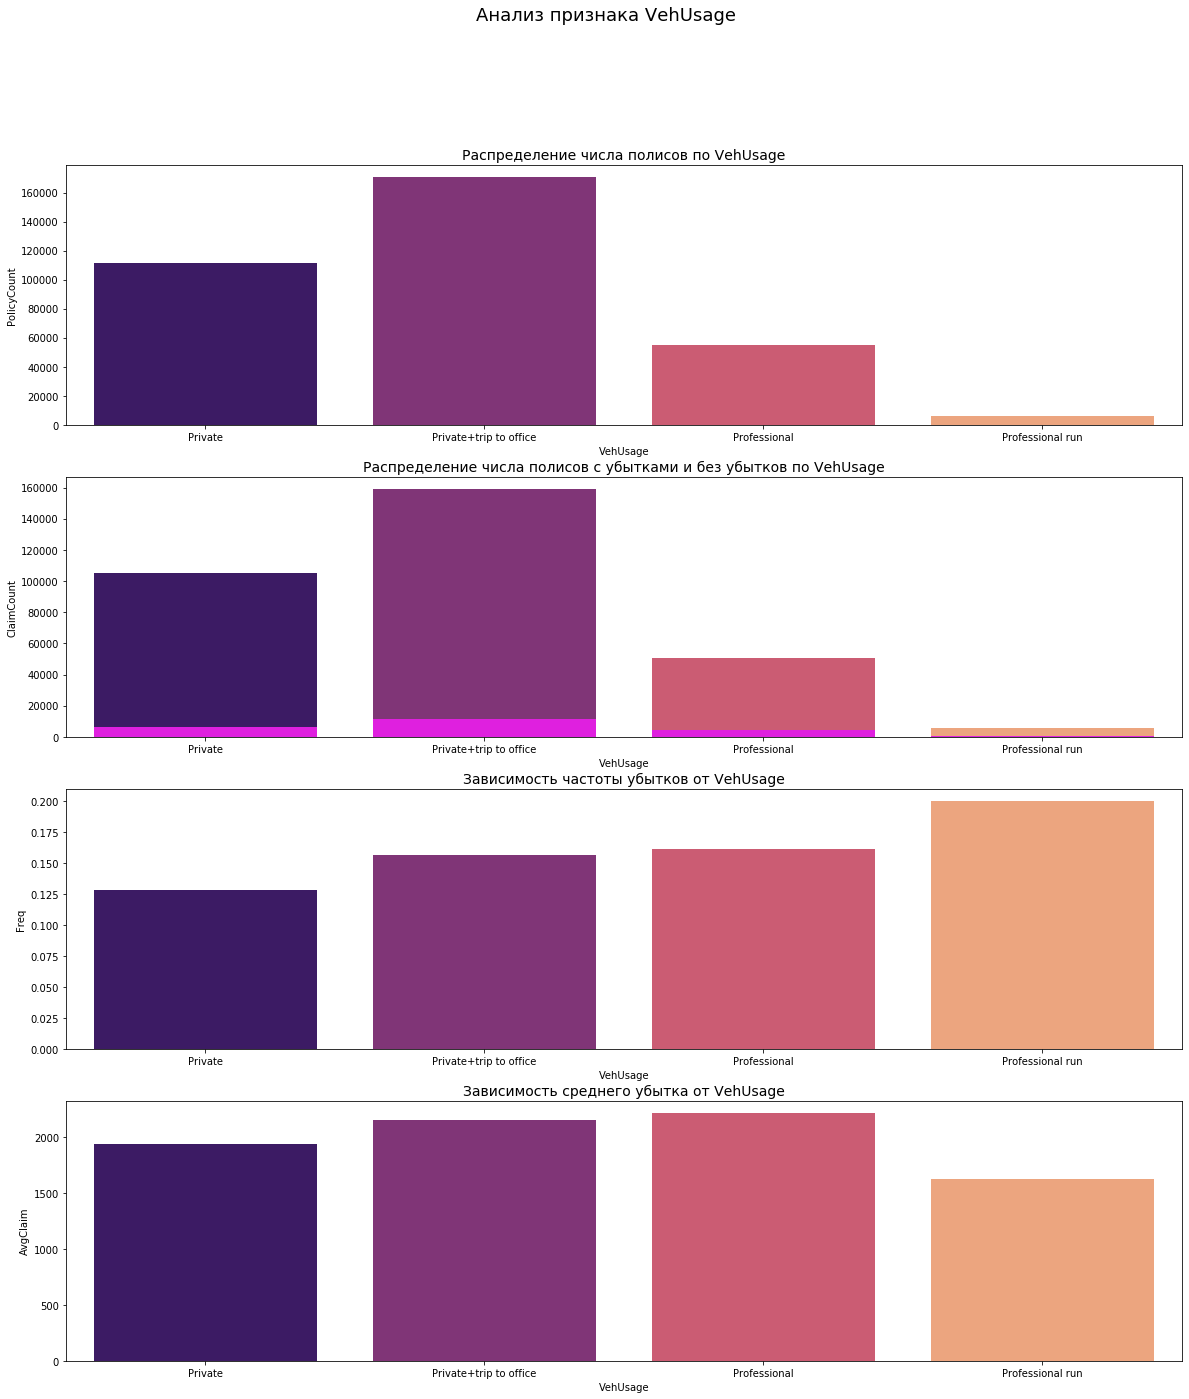

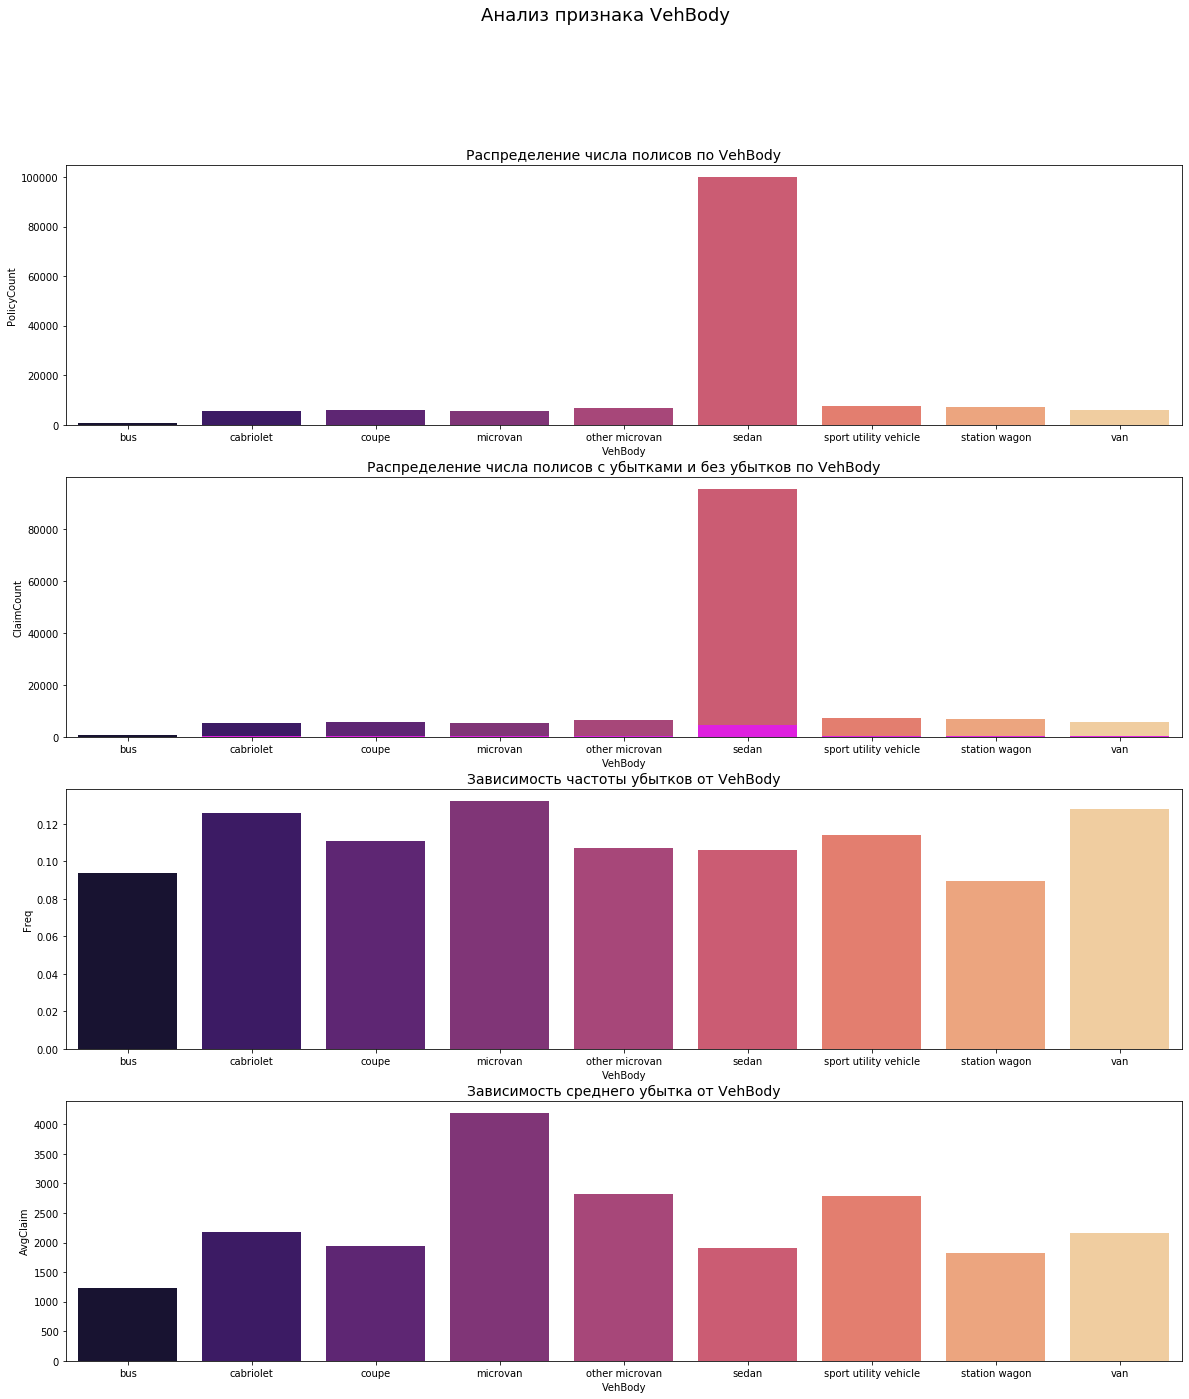

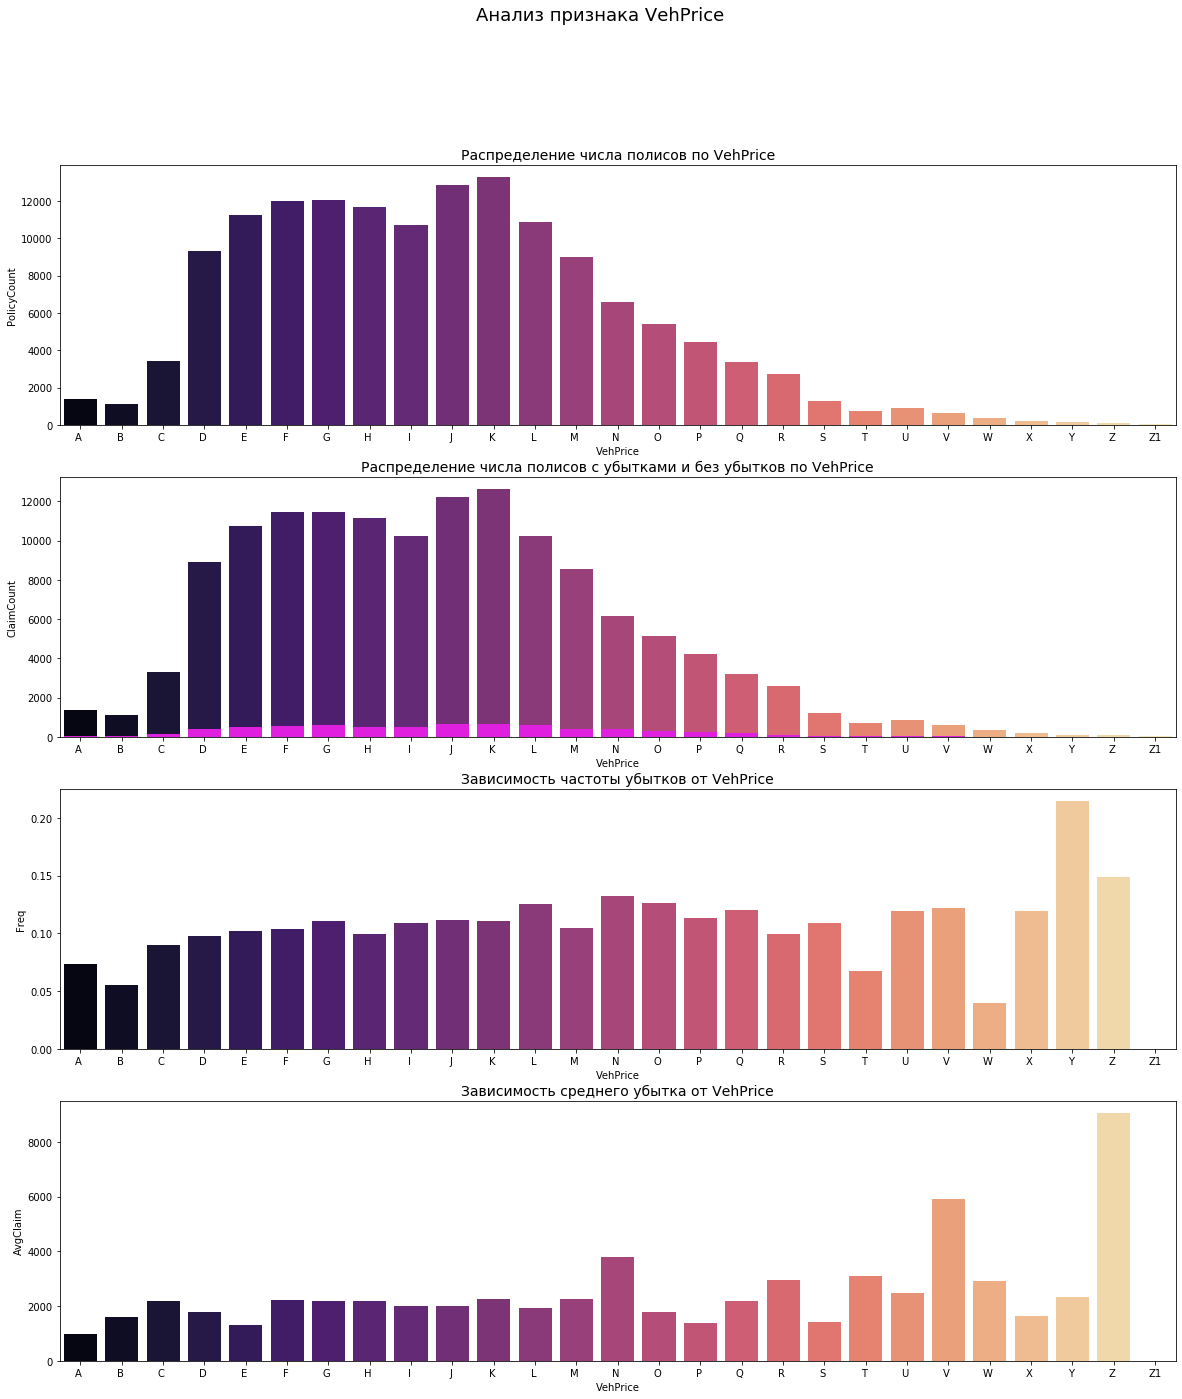

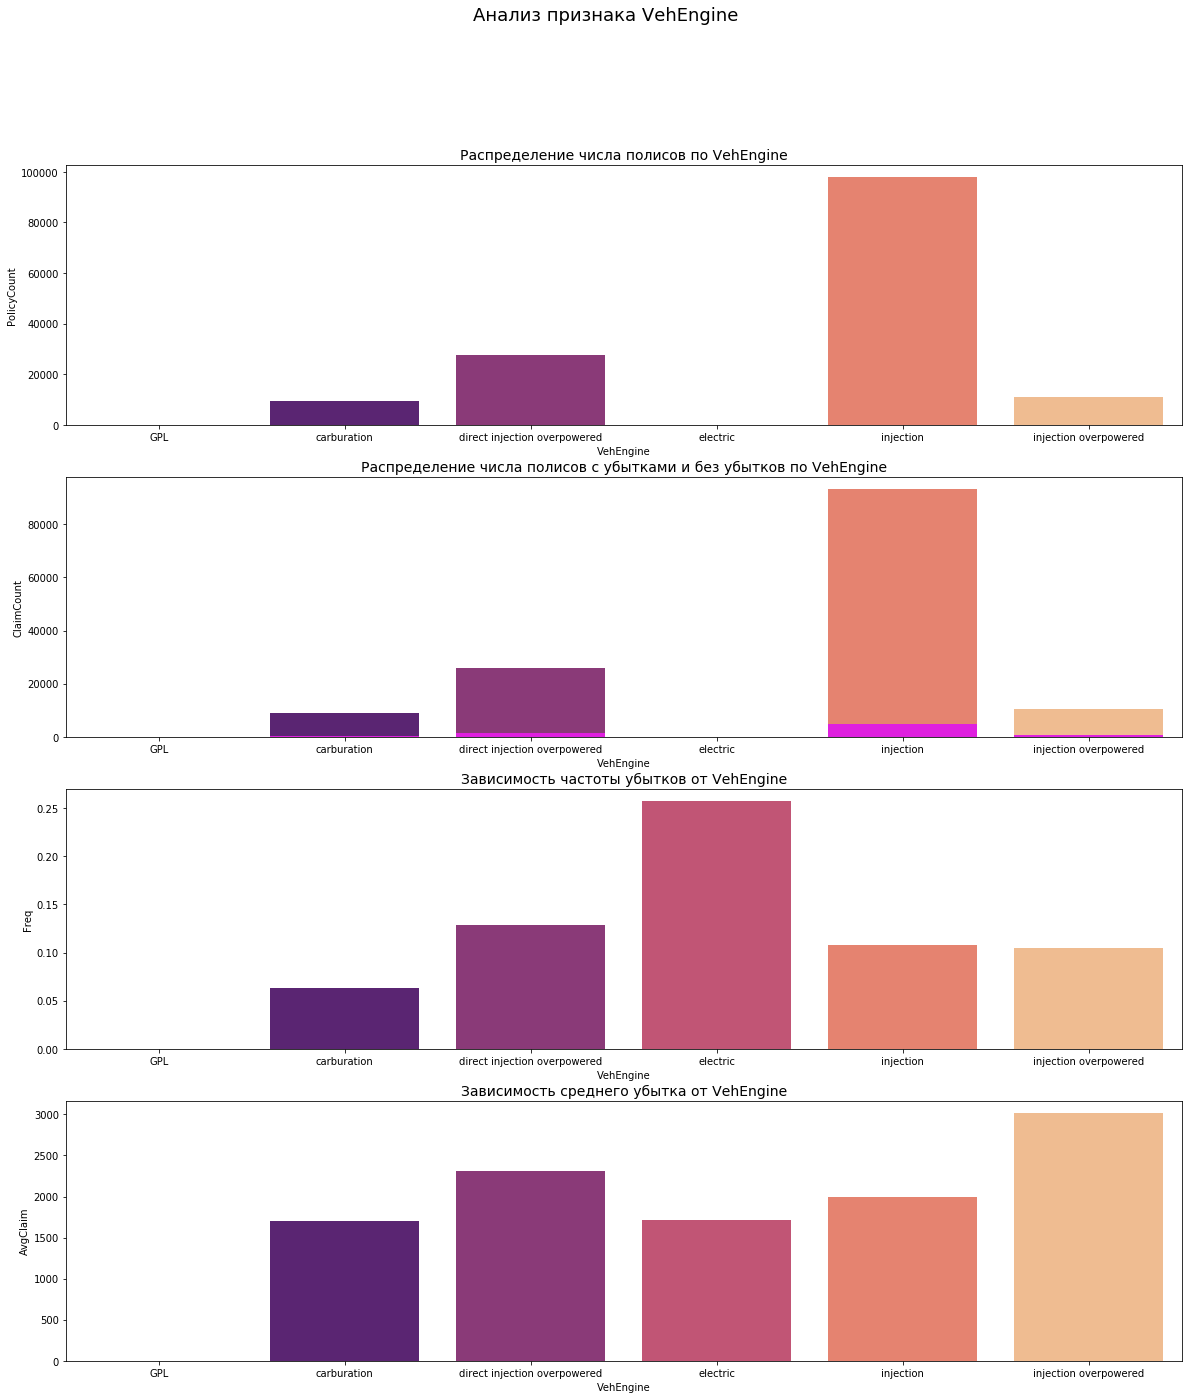

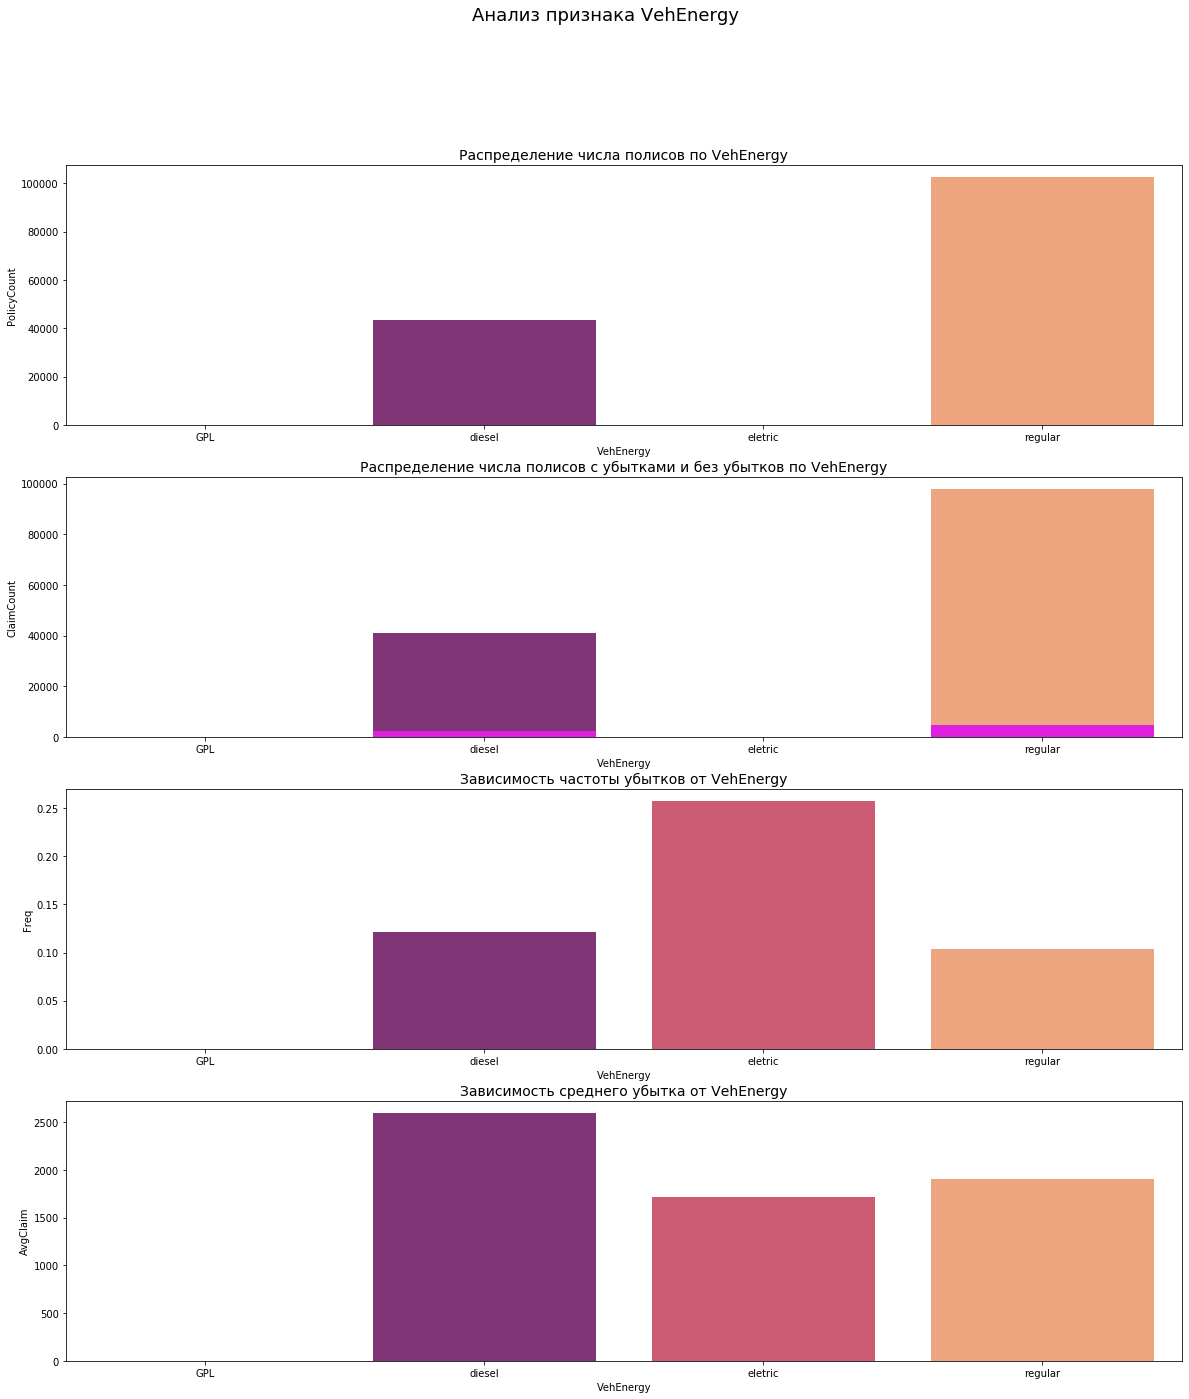

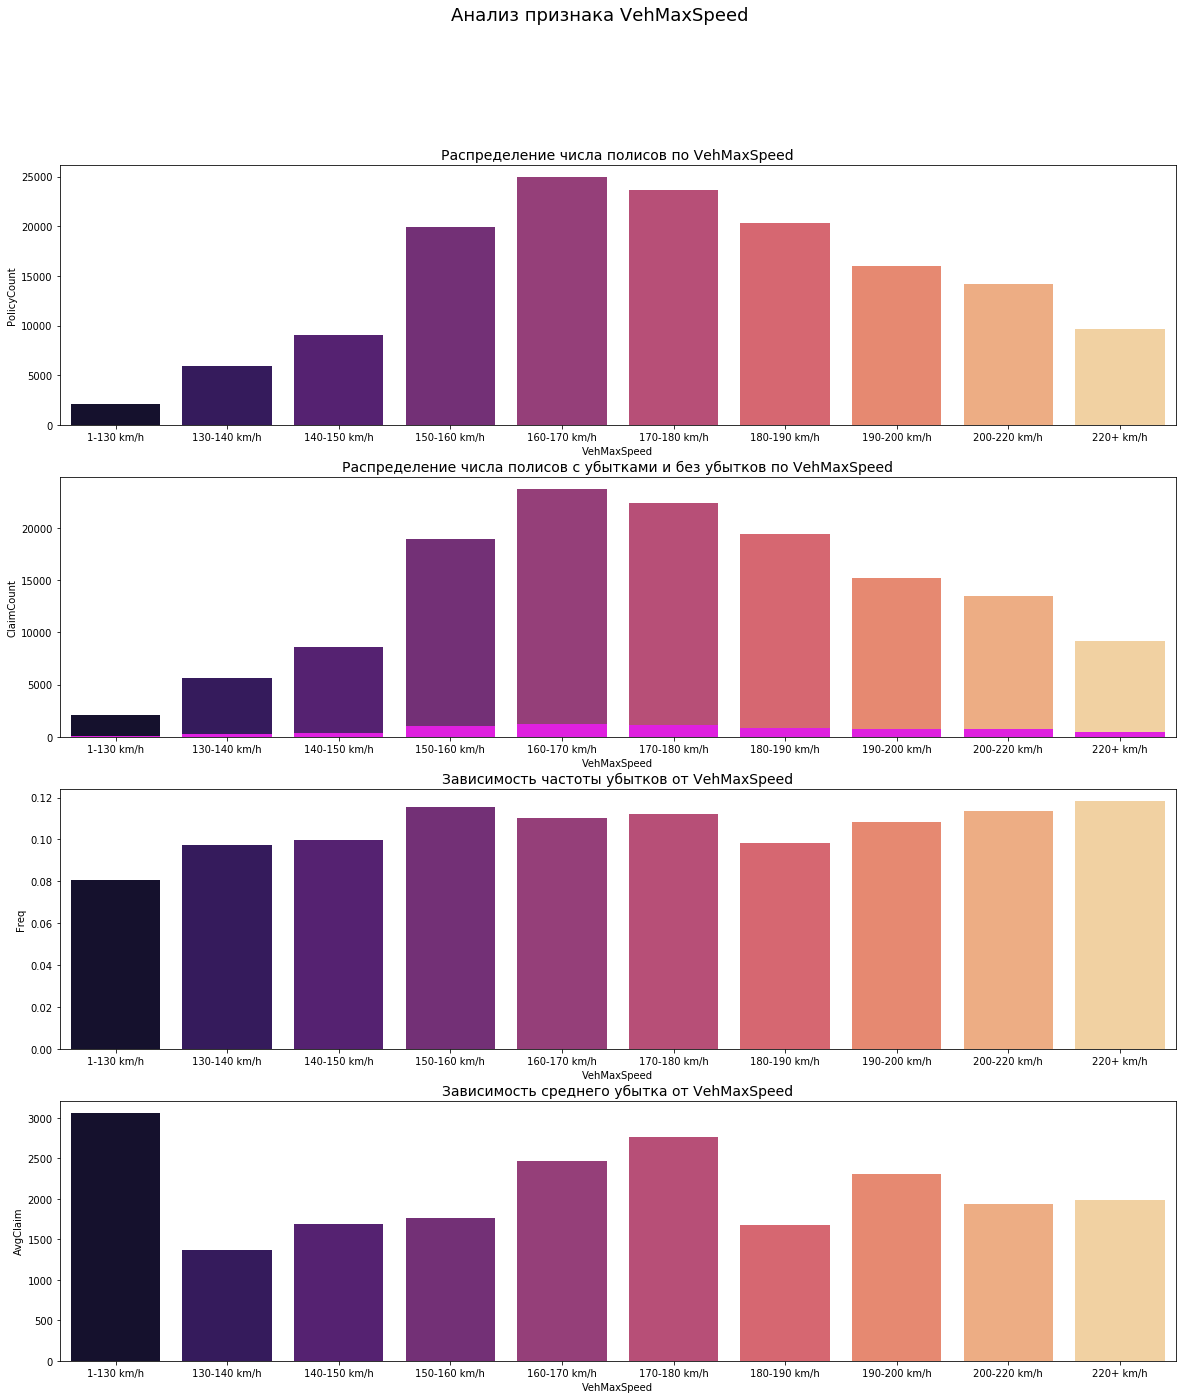

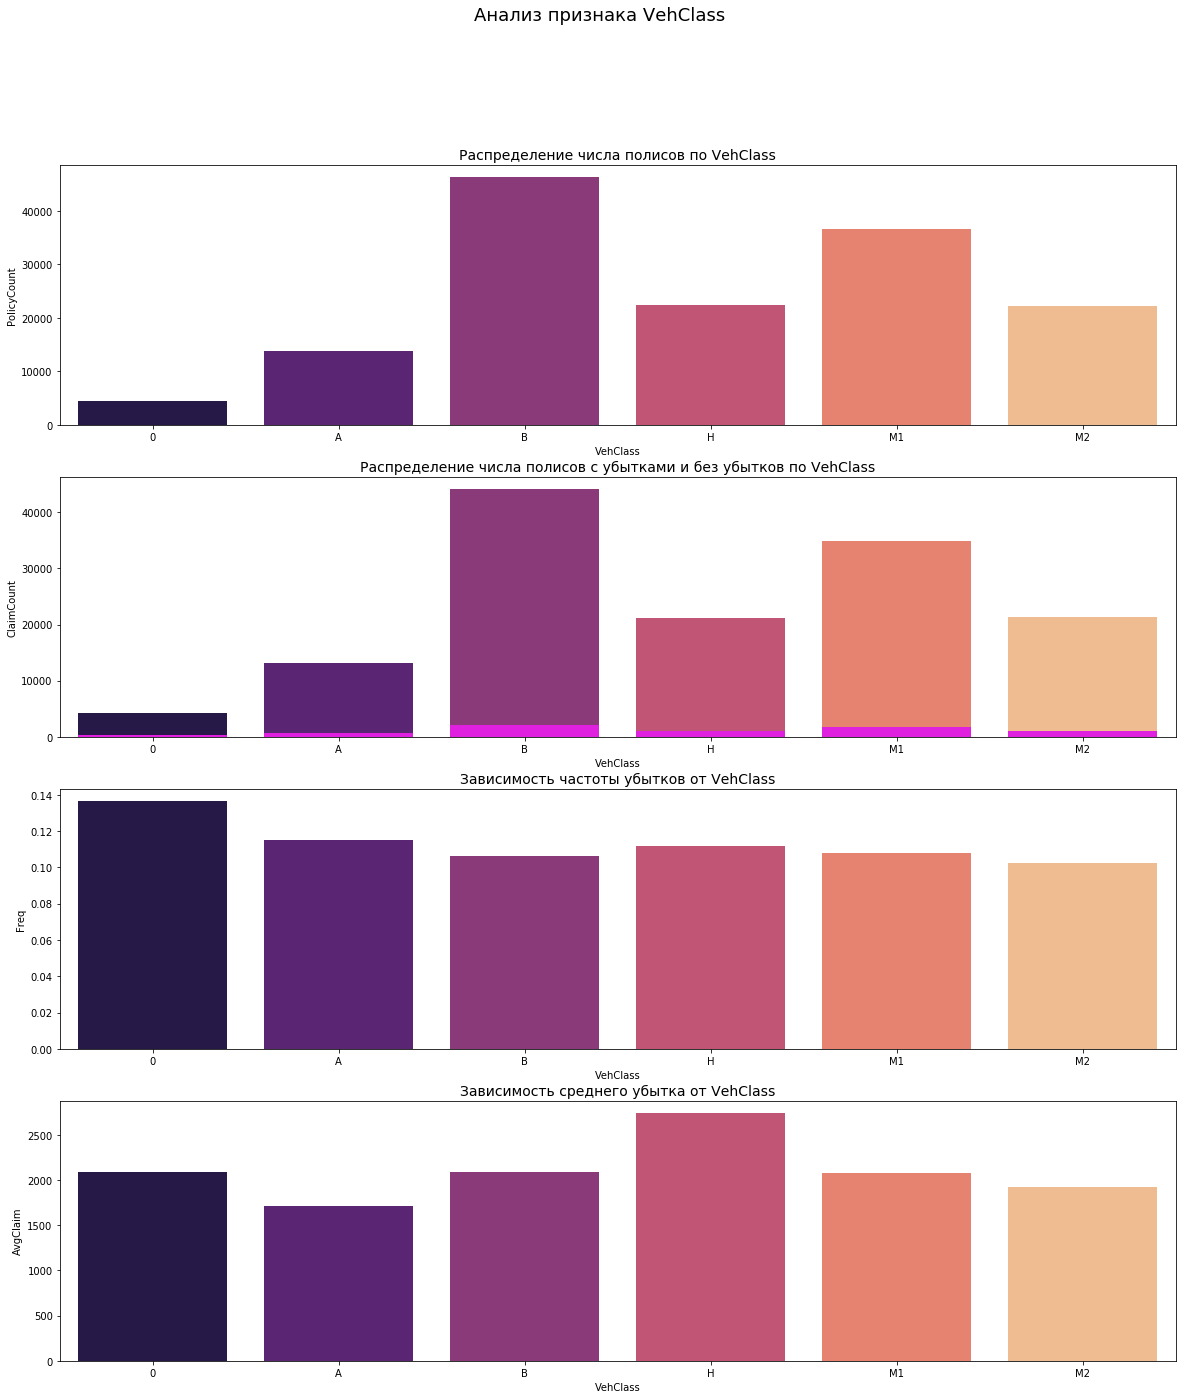

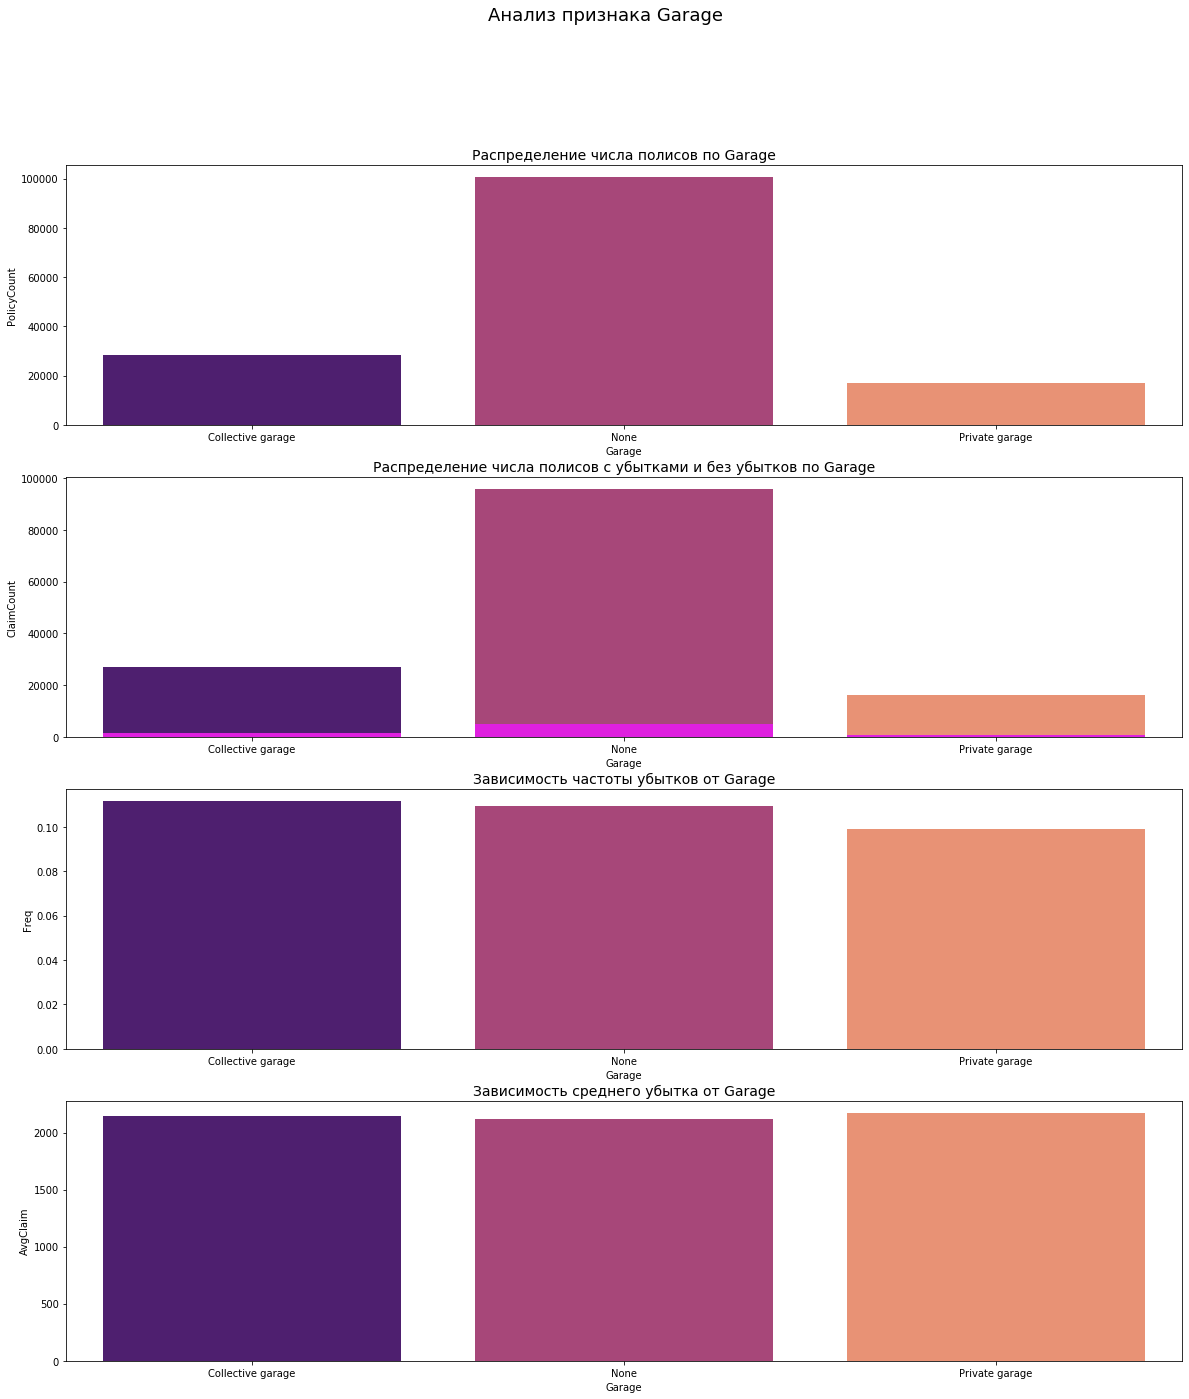

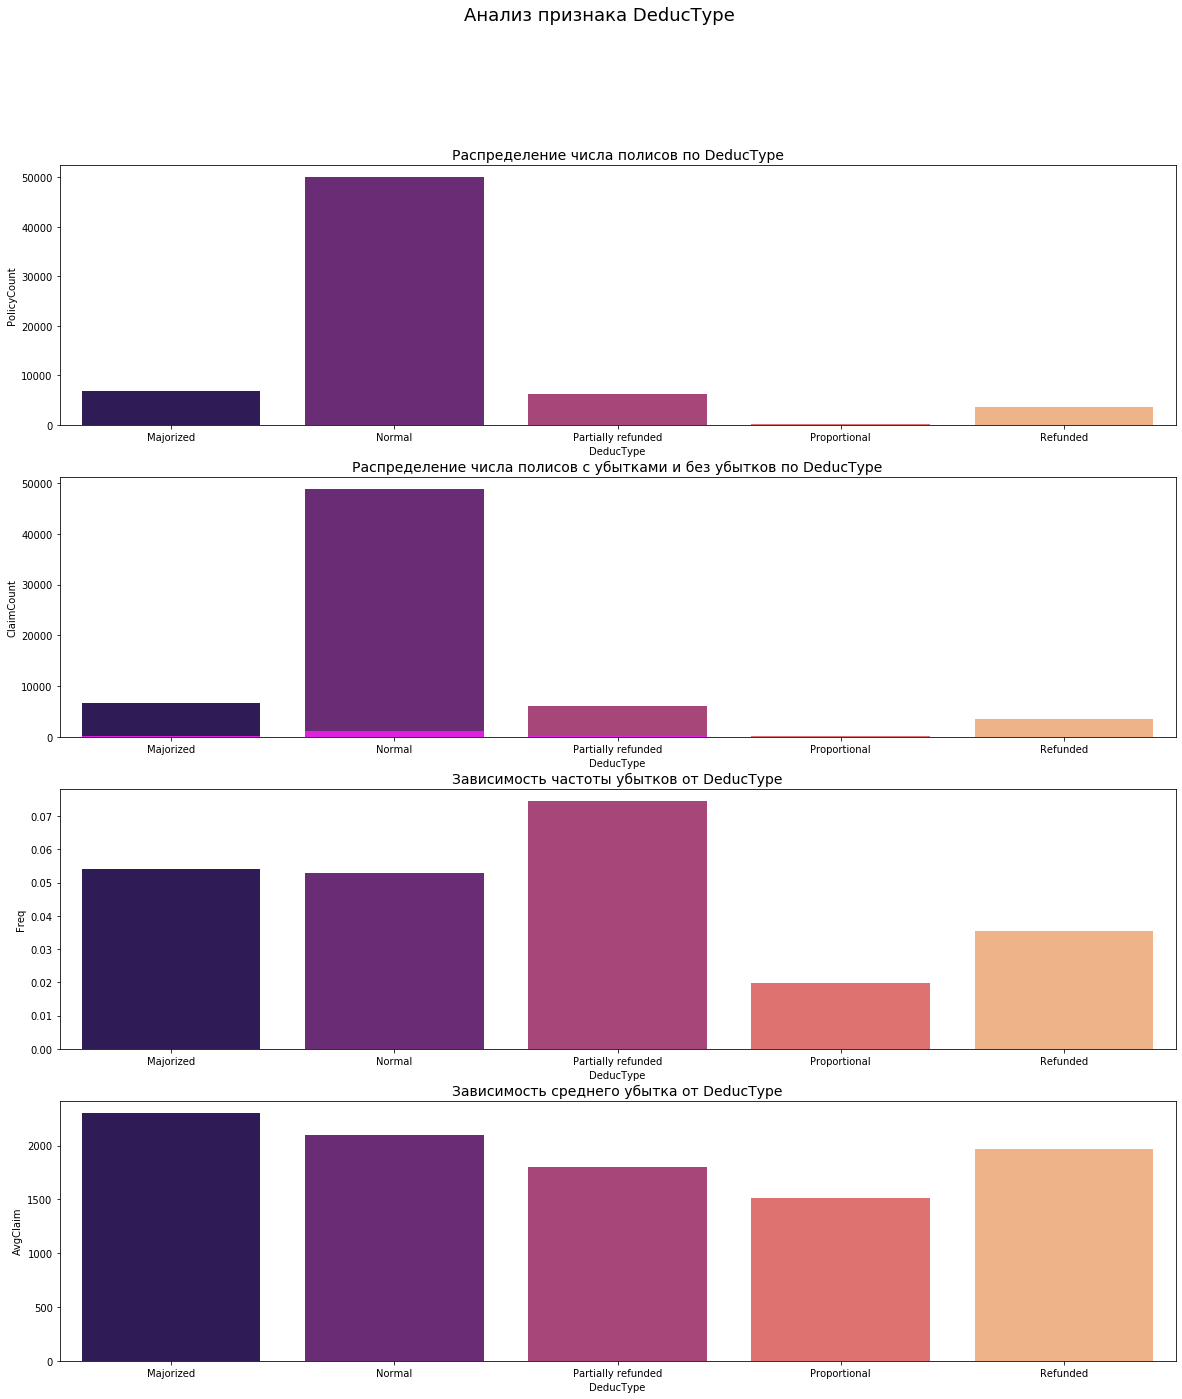

In [173]:
for feature in CAT_FEATURE_NAMES:
    plot_feature(df, feature)

Выводы: 
- Самый высокий средний убыток - при VehUsage=Professional
- Самое большое число полисов выписано на VehBody=sedan. Cамый высокий средний убыток - при VehBody=microvan.
- Самая высокая частота убытков у VehPrice=Y и Z. самый высокий средний убыток - при VehPrice=Z.
- Cамый высокий средний убыток - при VehEngine=injection overpowered
- Cамый высокий средний убыток - при VehEnergy=diesel. Нужно учитывать, что VehEnergy = electric - очень мало. 
- Непонятно про VehMaxSpeed. Самый высокий средний убыток - при VehMaxSpeed=1-130 km/h, также как и самая низкая частота убытков
- Cамый высокий средний убыток - при DeducType=Majorized

In [157]:
def plot_dist(df, feature):
    plt.figure(figsize=(8, 3.5))
    sns.distplot(df[feature], color='g')
    plt.title(f'Распределение {feature}', size=14)    
    plt.show()

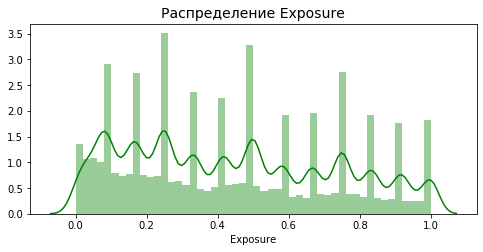

In [158]:
feature = 'Exposure'
plot_dist(df, feature)

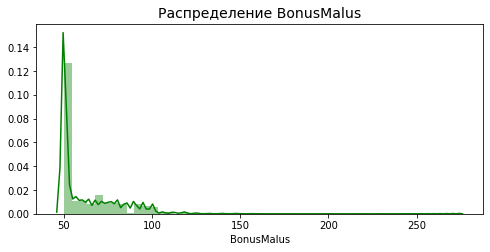

In [159]:
feature = 'BonusMalus'
plot_dist(df, feature)

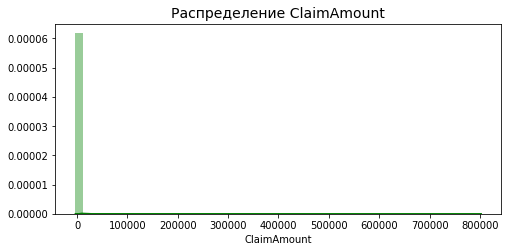

In [160]:
feature = 'ClaimAmount'
plot_dist(df, feature)

- Exposure равномерно распределенно на интервале от 0 до 1. Плотность распределения снижается от начала года к концу.
- BonusMalus Значения BonusMalus расположены в интервале от 50 до 272. Большинство значений находится в интервале от 50 до 100, причем больше половины приходится на BonusMalus=50. 
- ClaimAmount Максимальное значение ClaimAmount превышает 800000. Нужно больше данных по этому признаку. По мне, нерепрезентативно. 

In [161]:
NUMERICAL_FEATURE_NAMES.remove('BonusMalus')

In [162]:
NUMERICAL_FEATURE_NAMES.remove('Exposure')

In [164]:
NUMERICAL_FEATURE_NAMES.remove('ClaimAmount')

In [166]:
NUMERICAL_FEATURE_NAMES.remove('PolicyCount')

In [168]:
NUMERICAL_FEATURE_NAMES.remove('NoClaimCount')

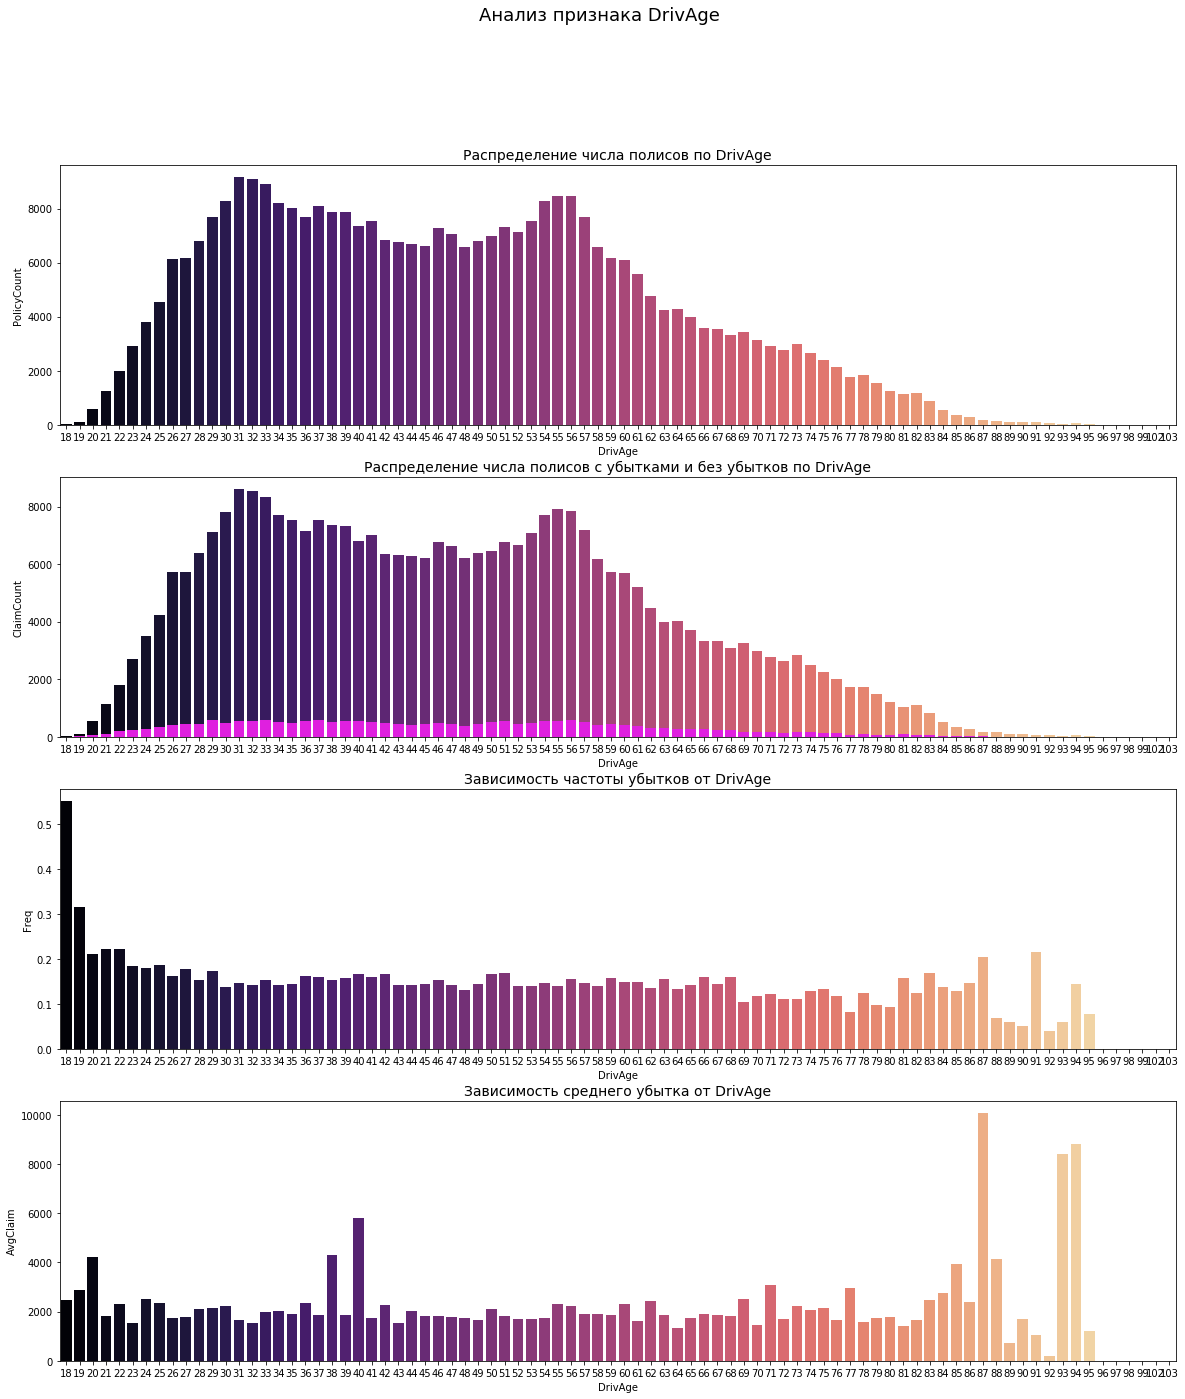

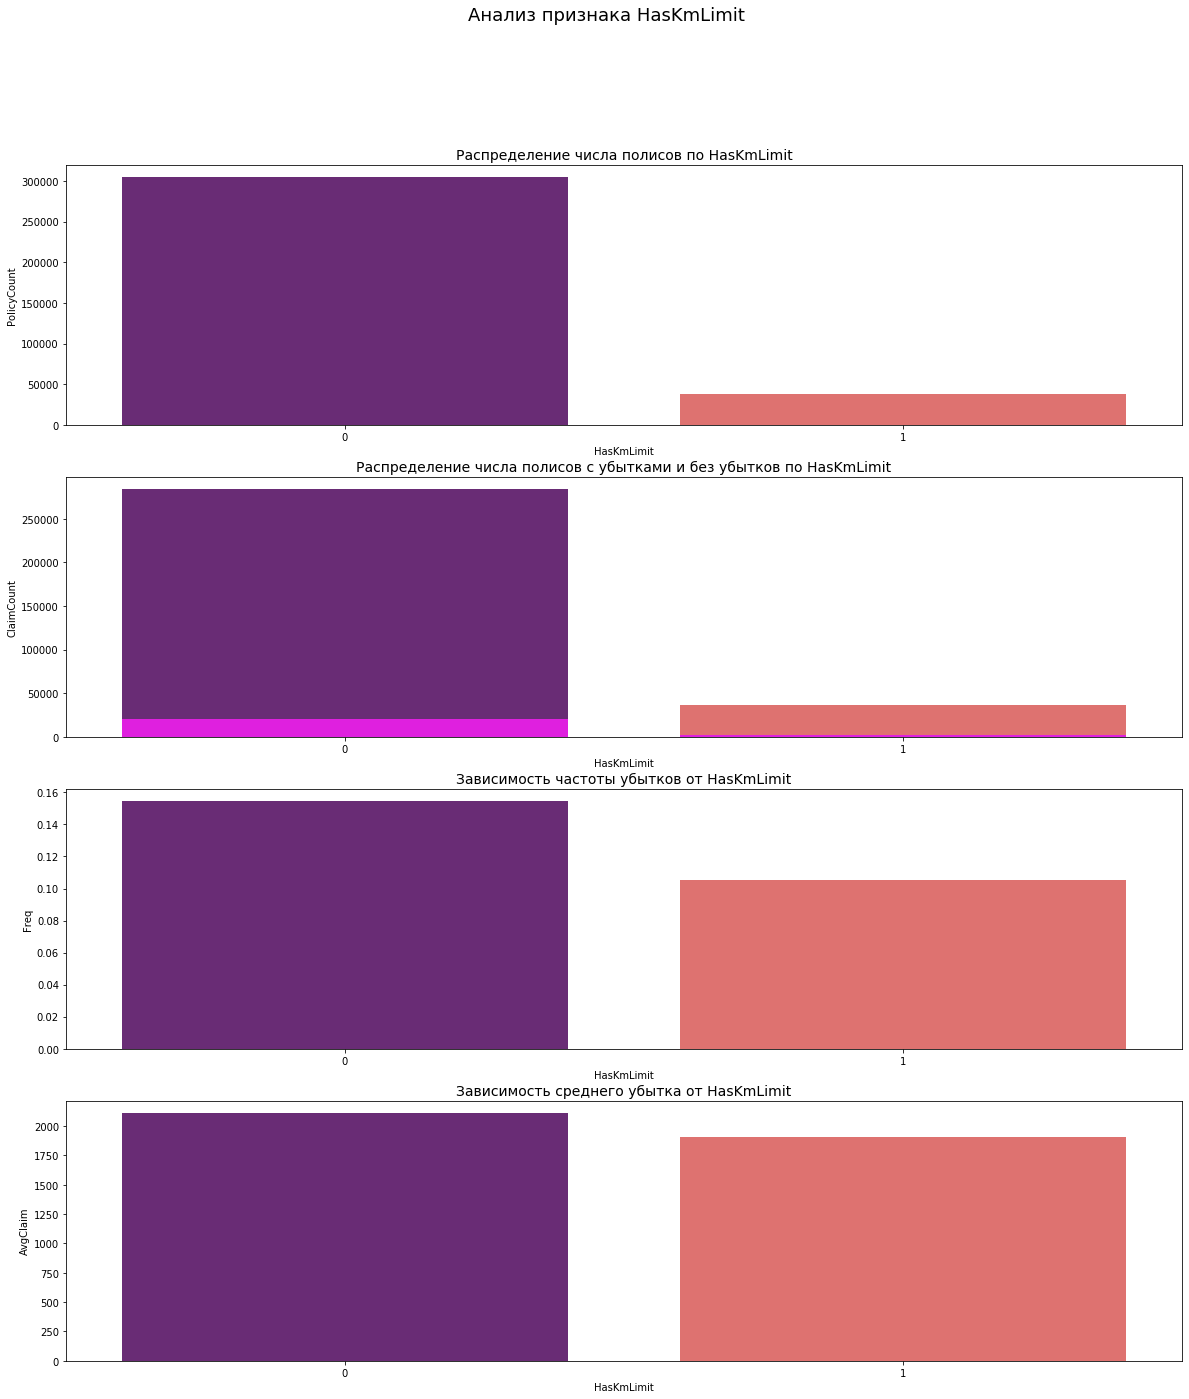

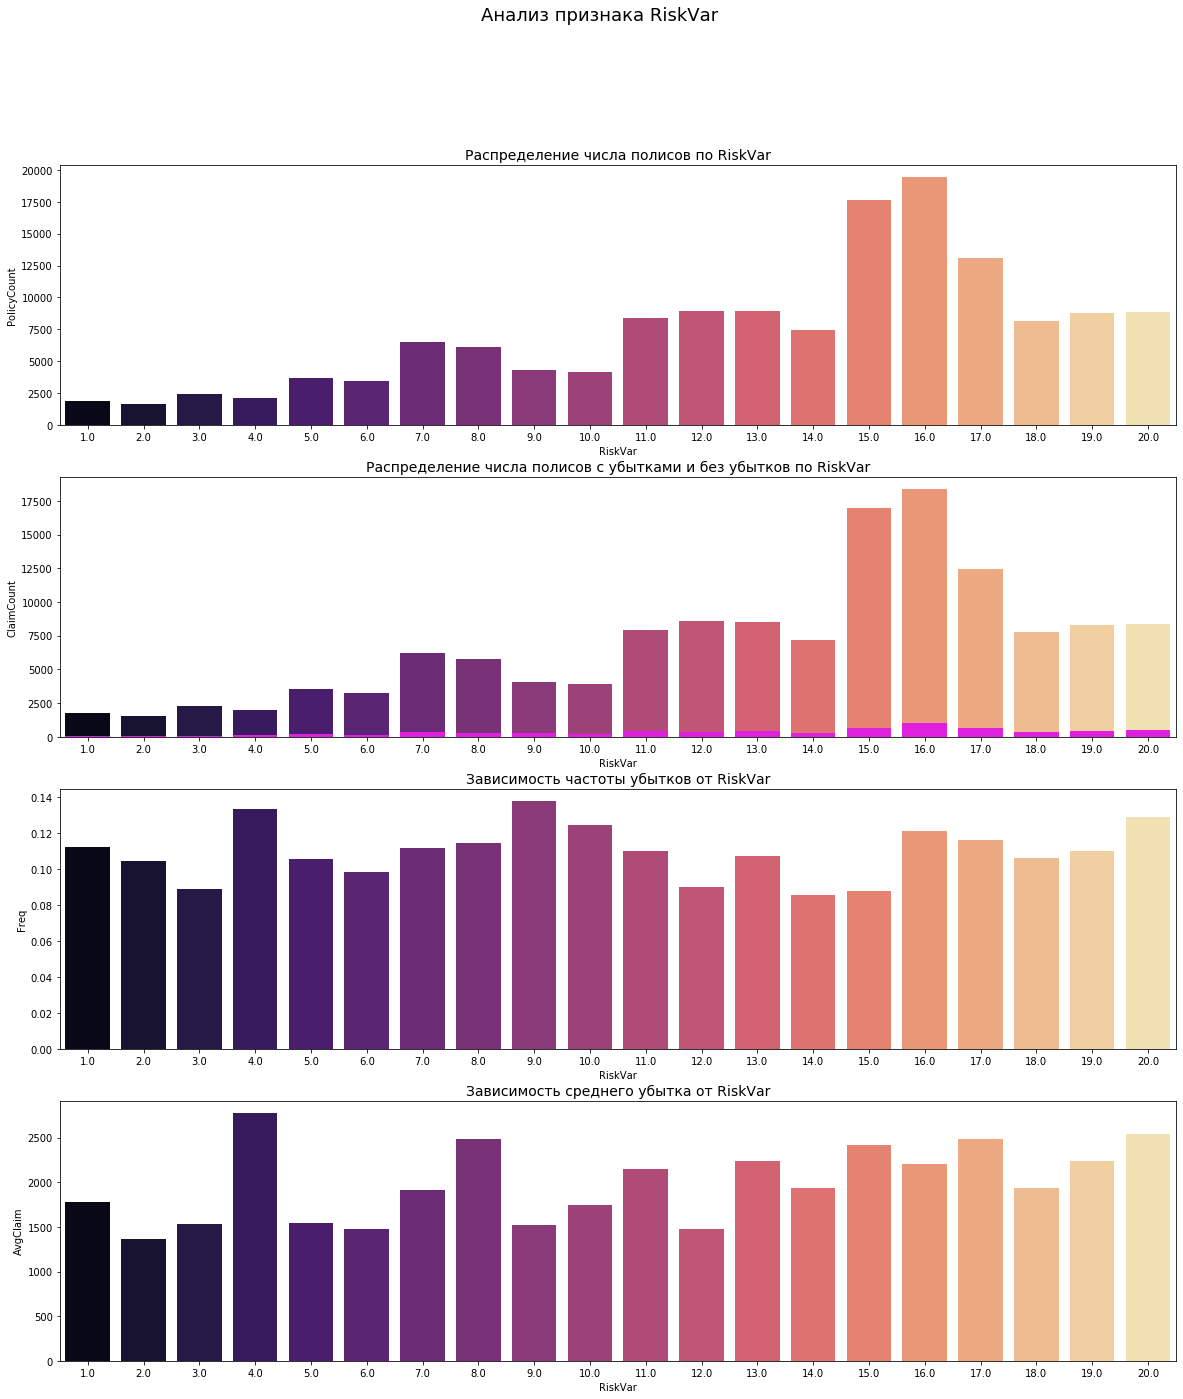

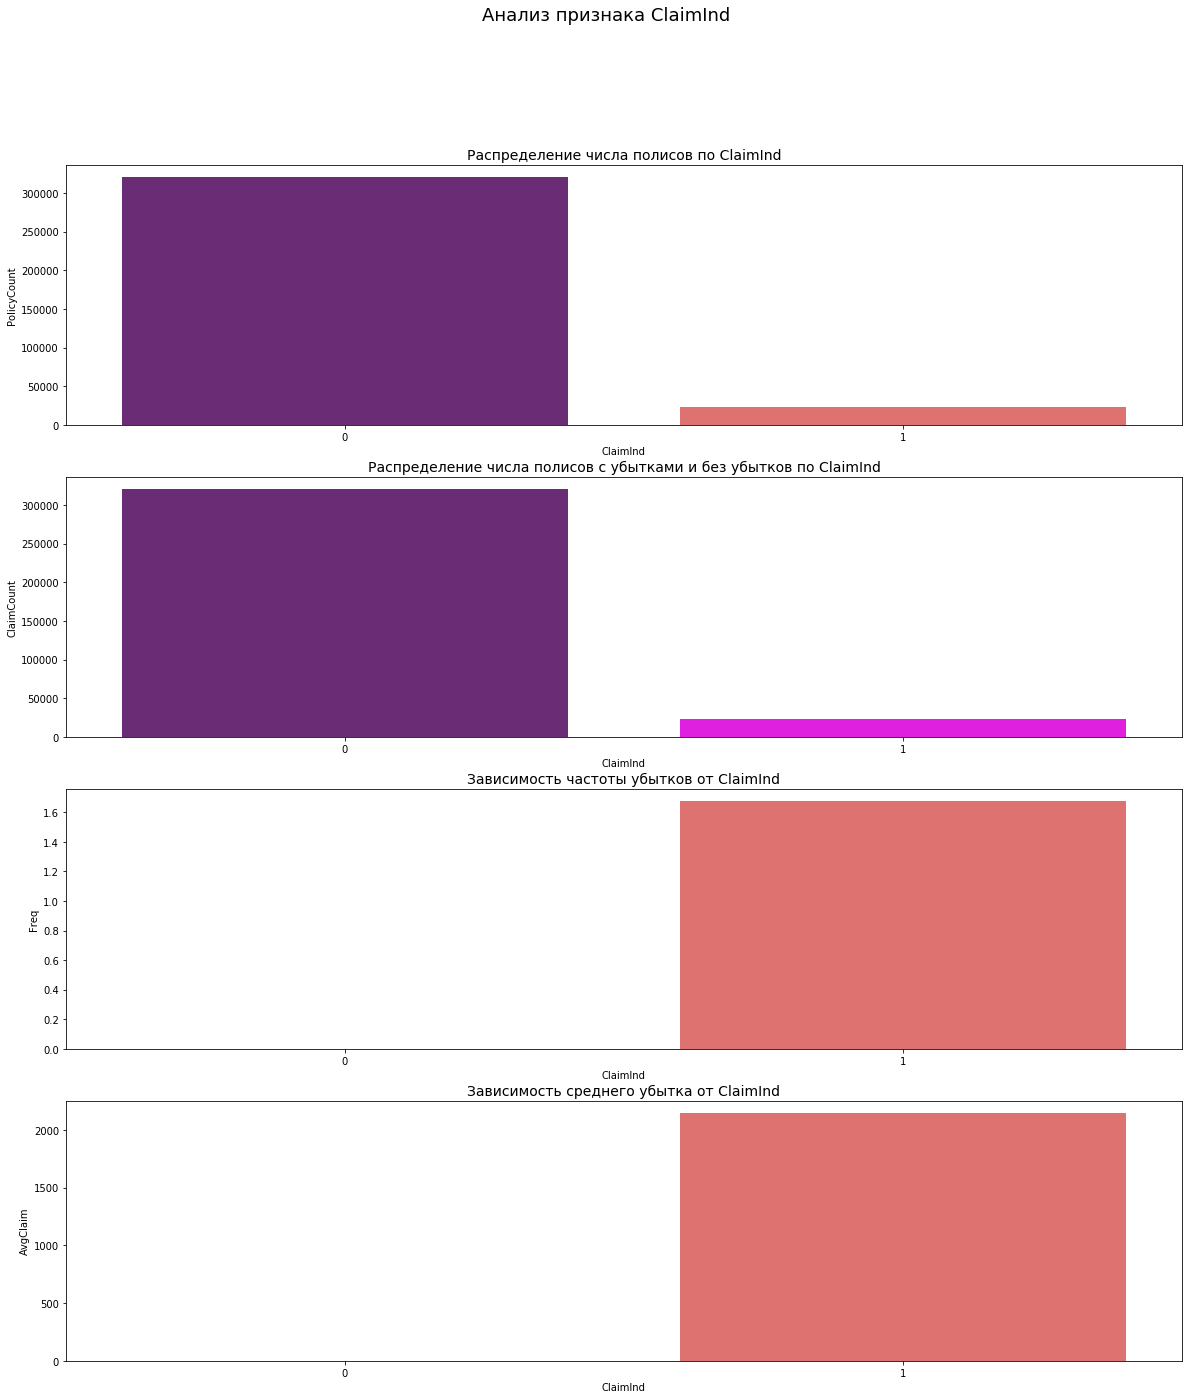

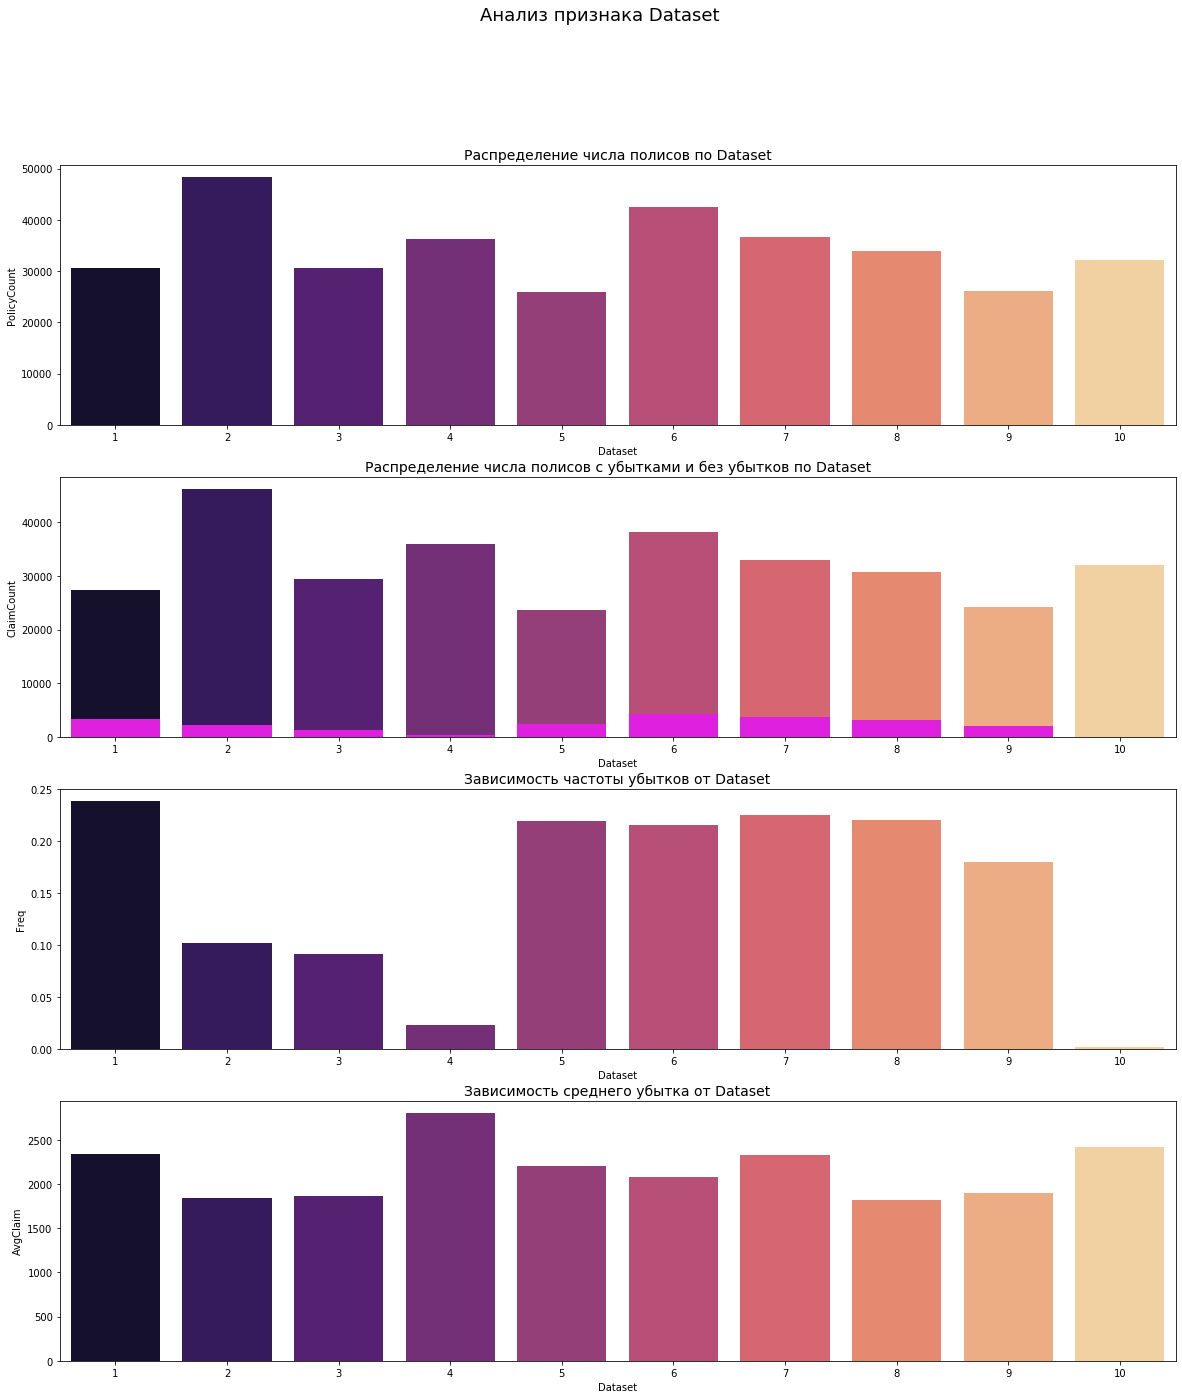

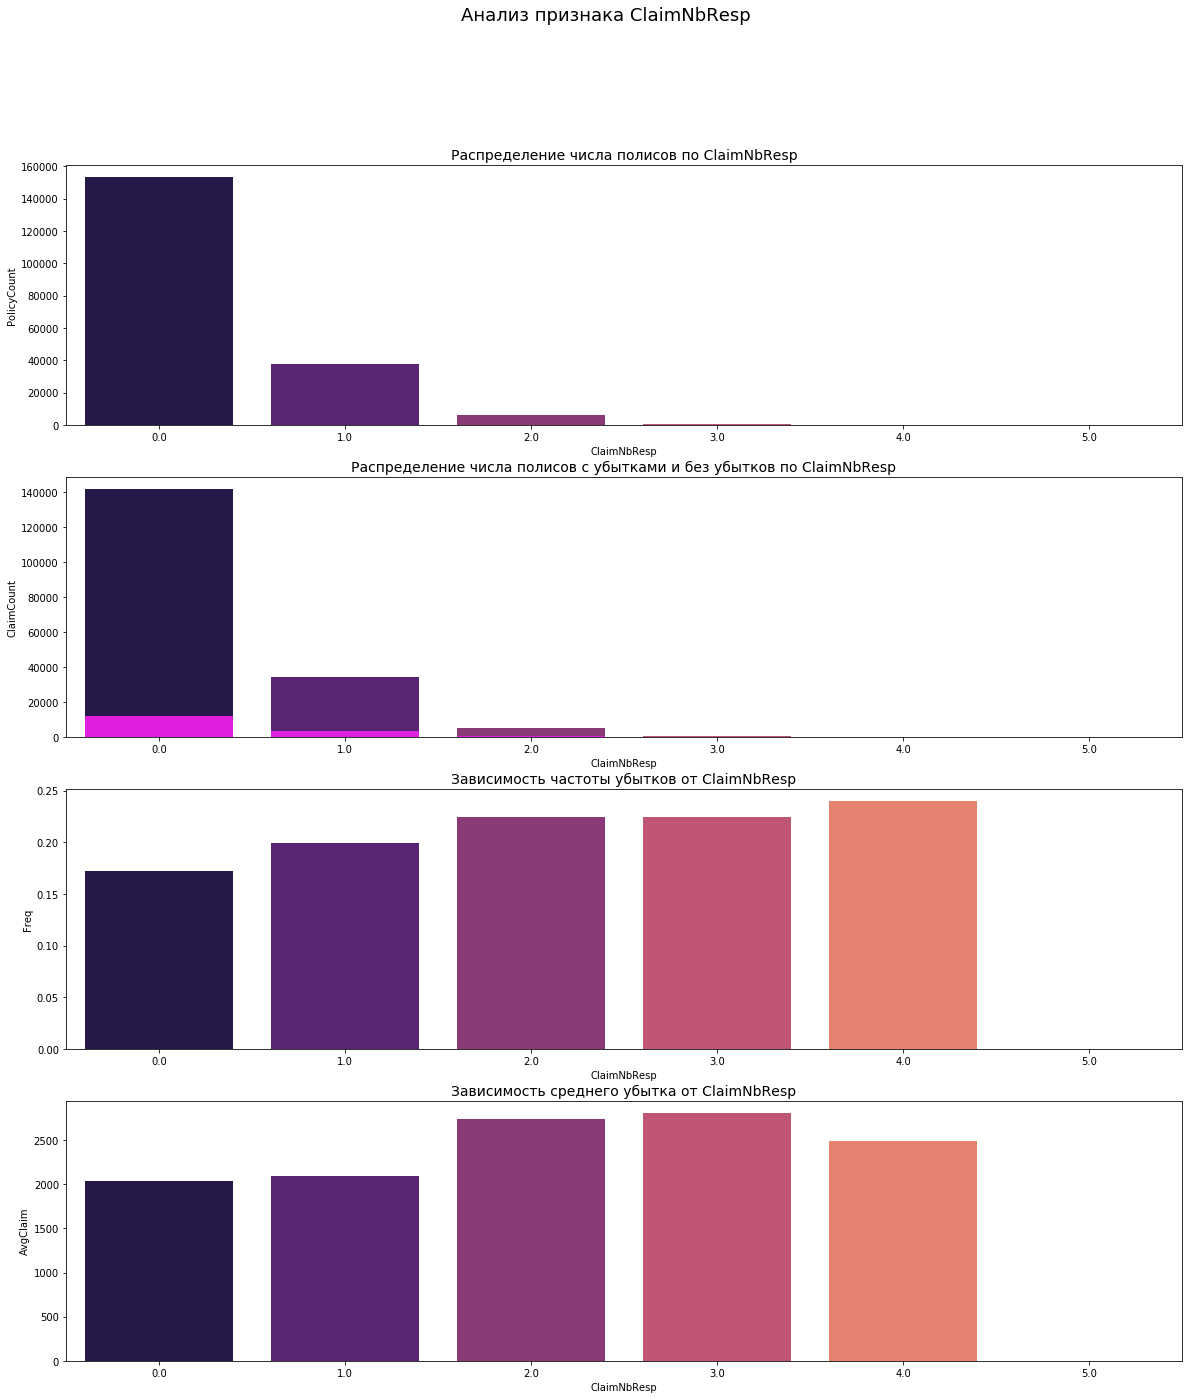

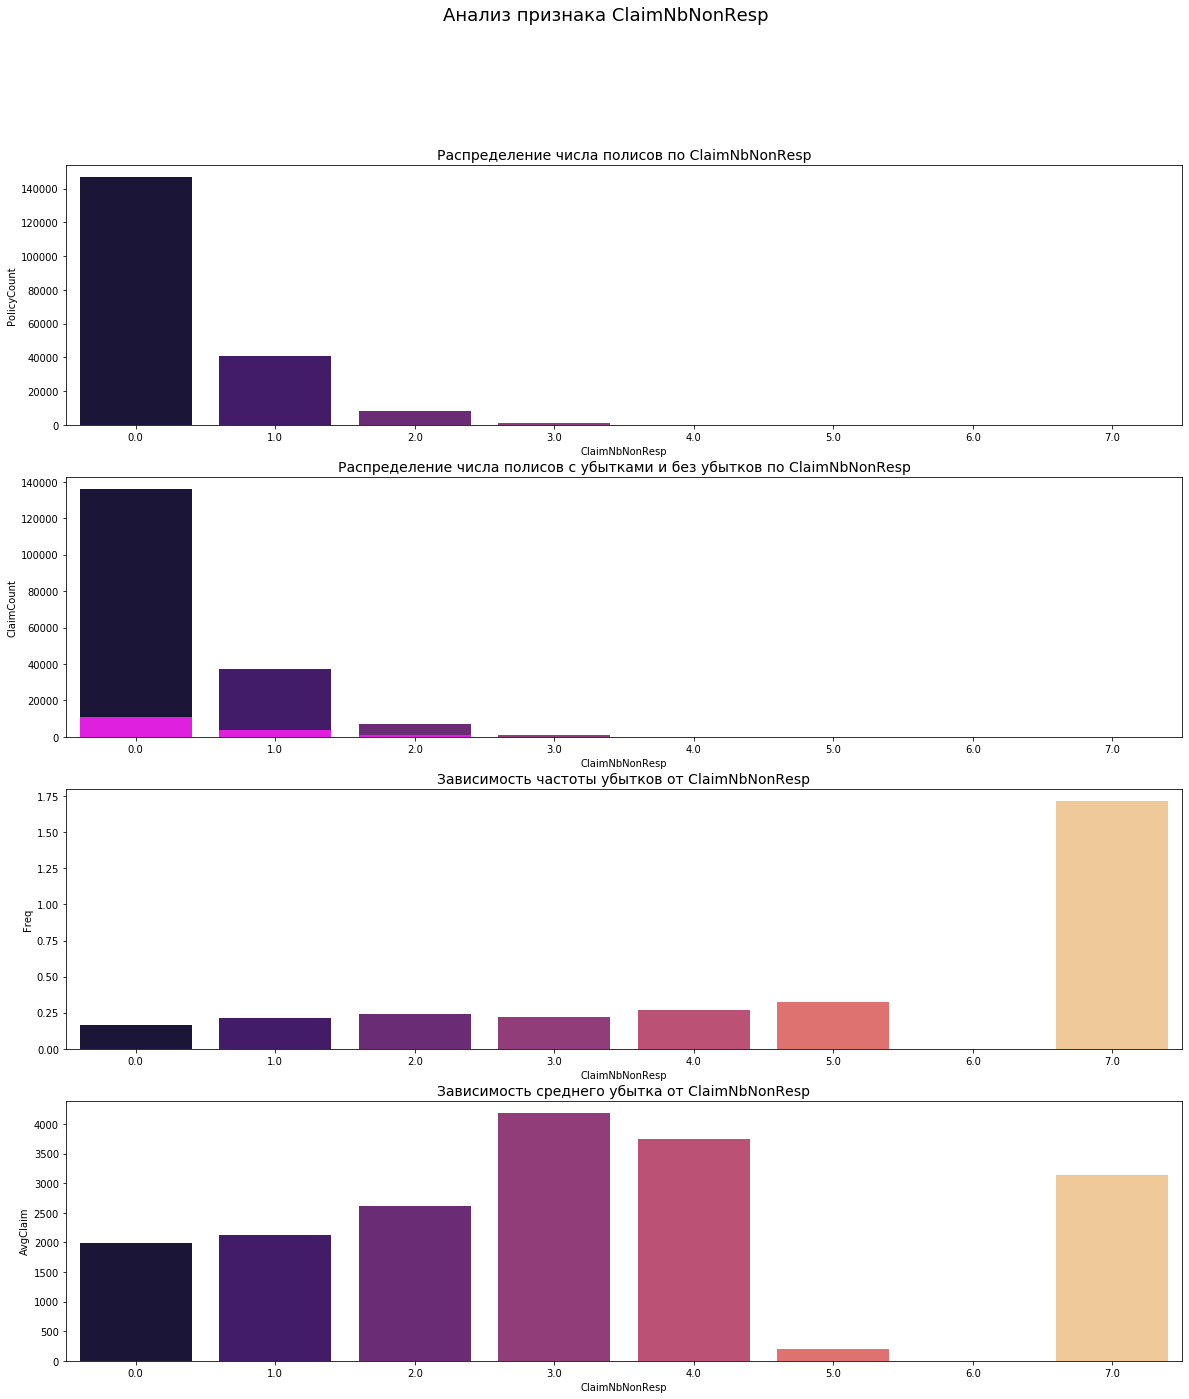

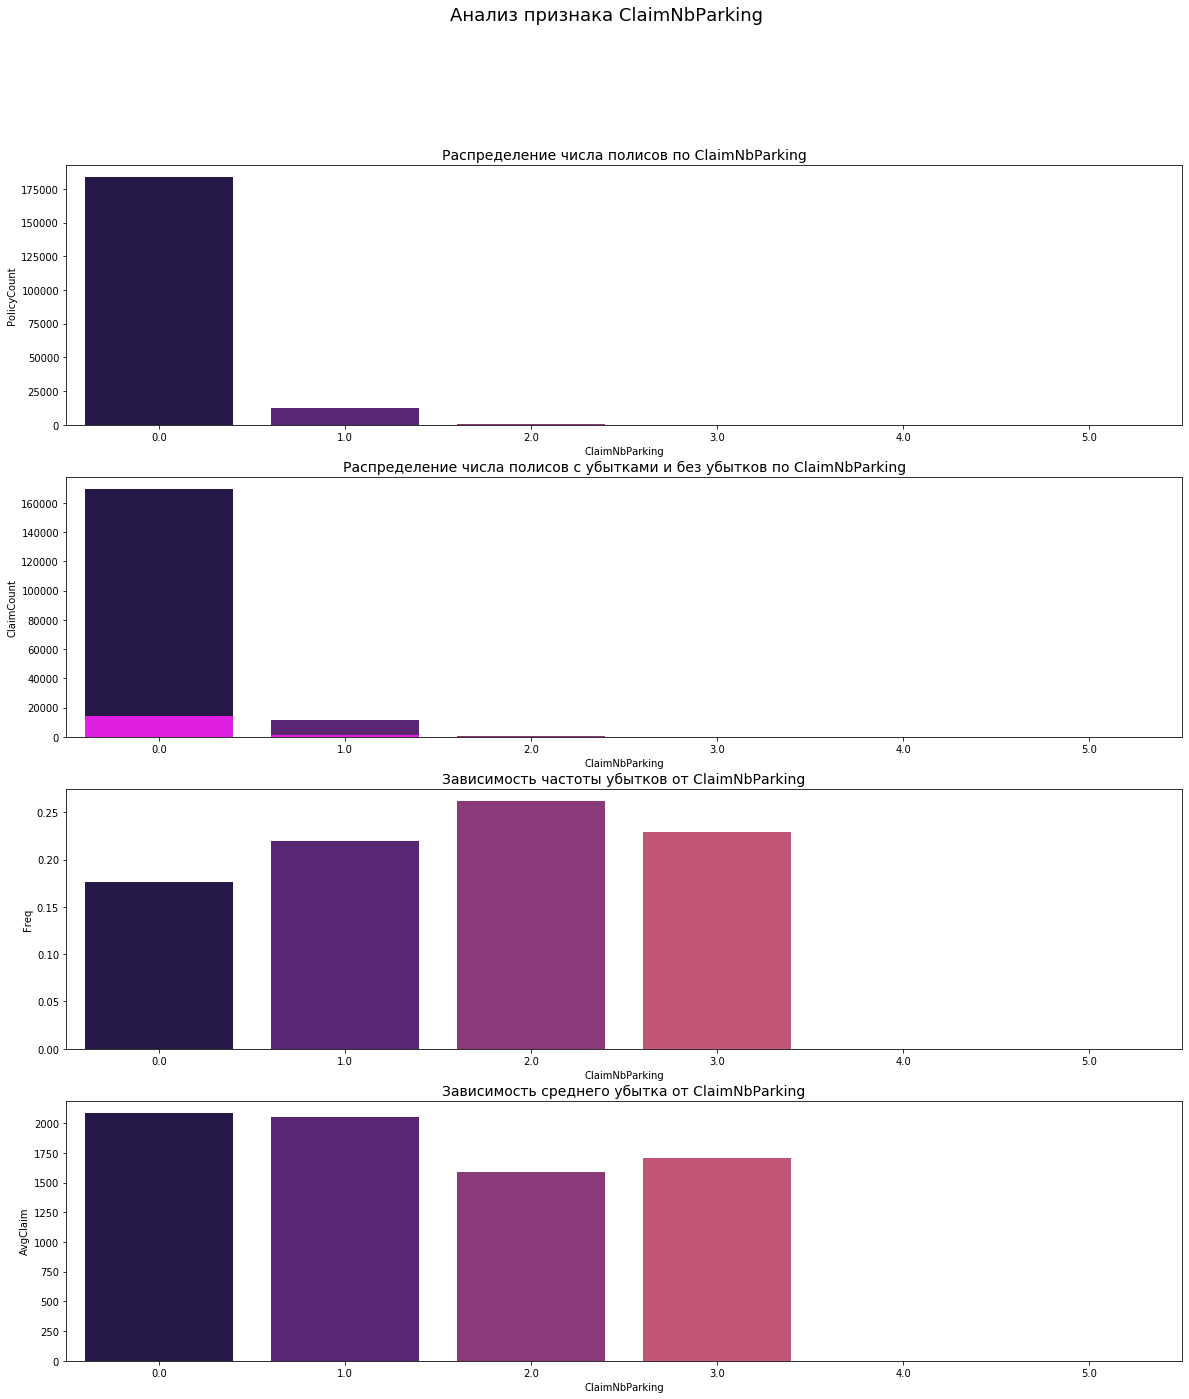

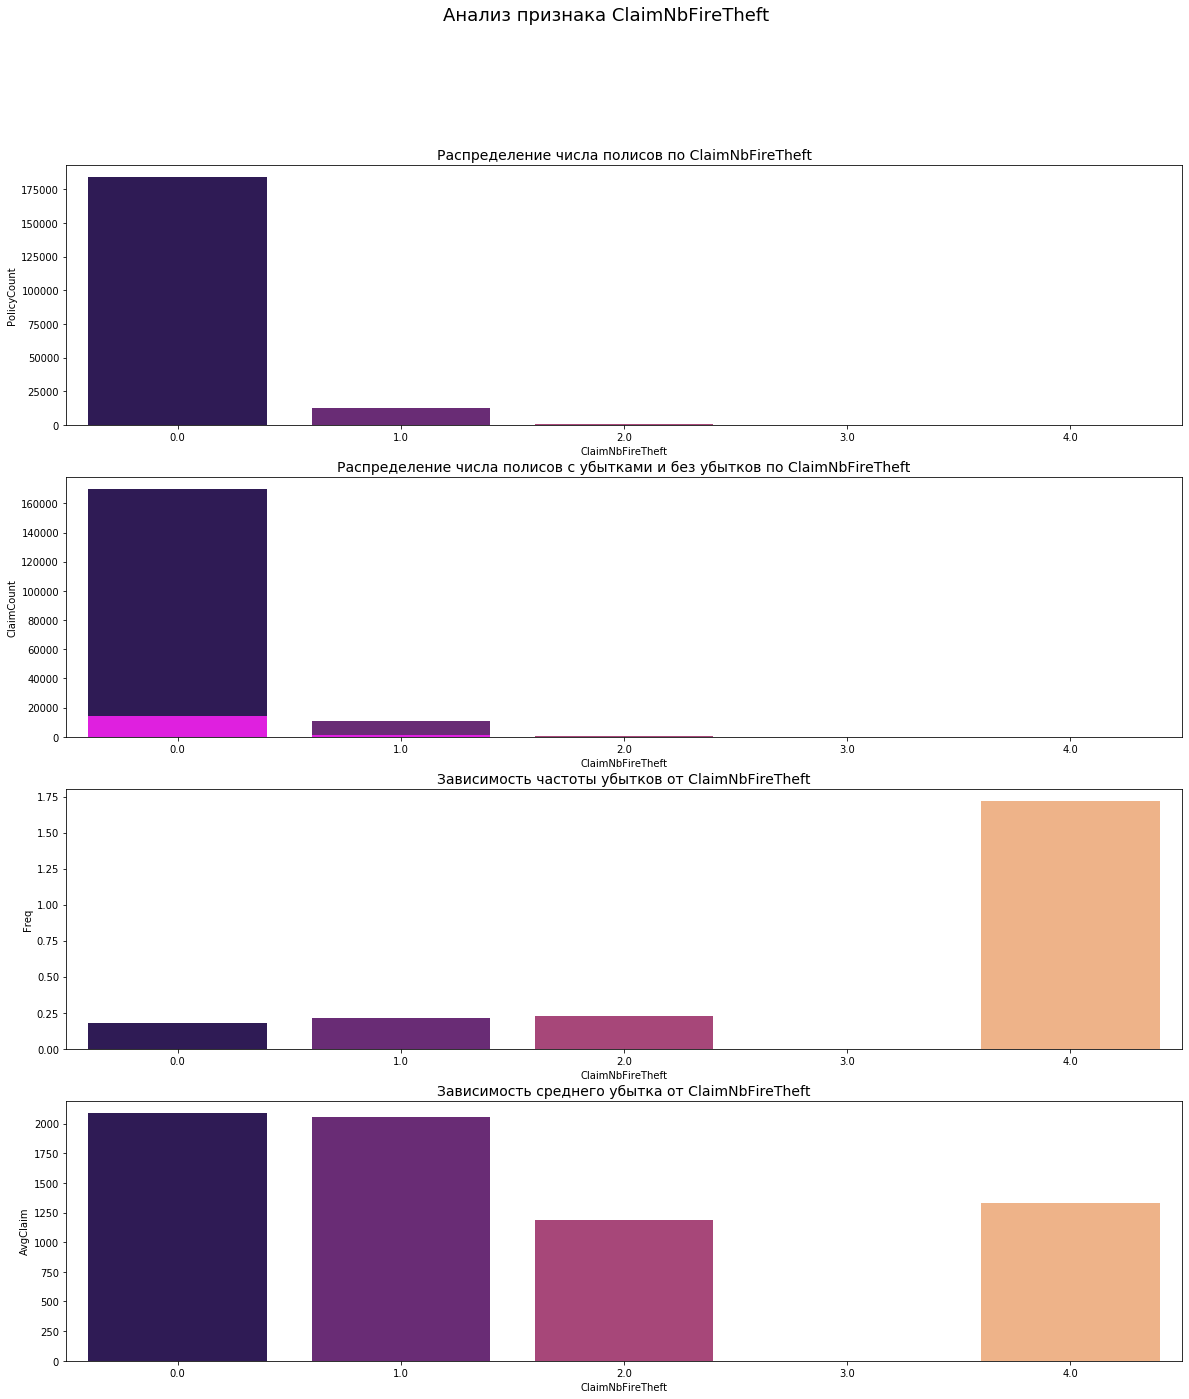

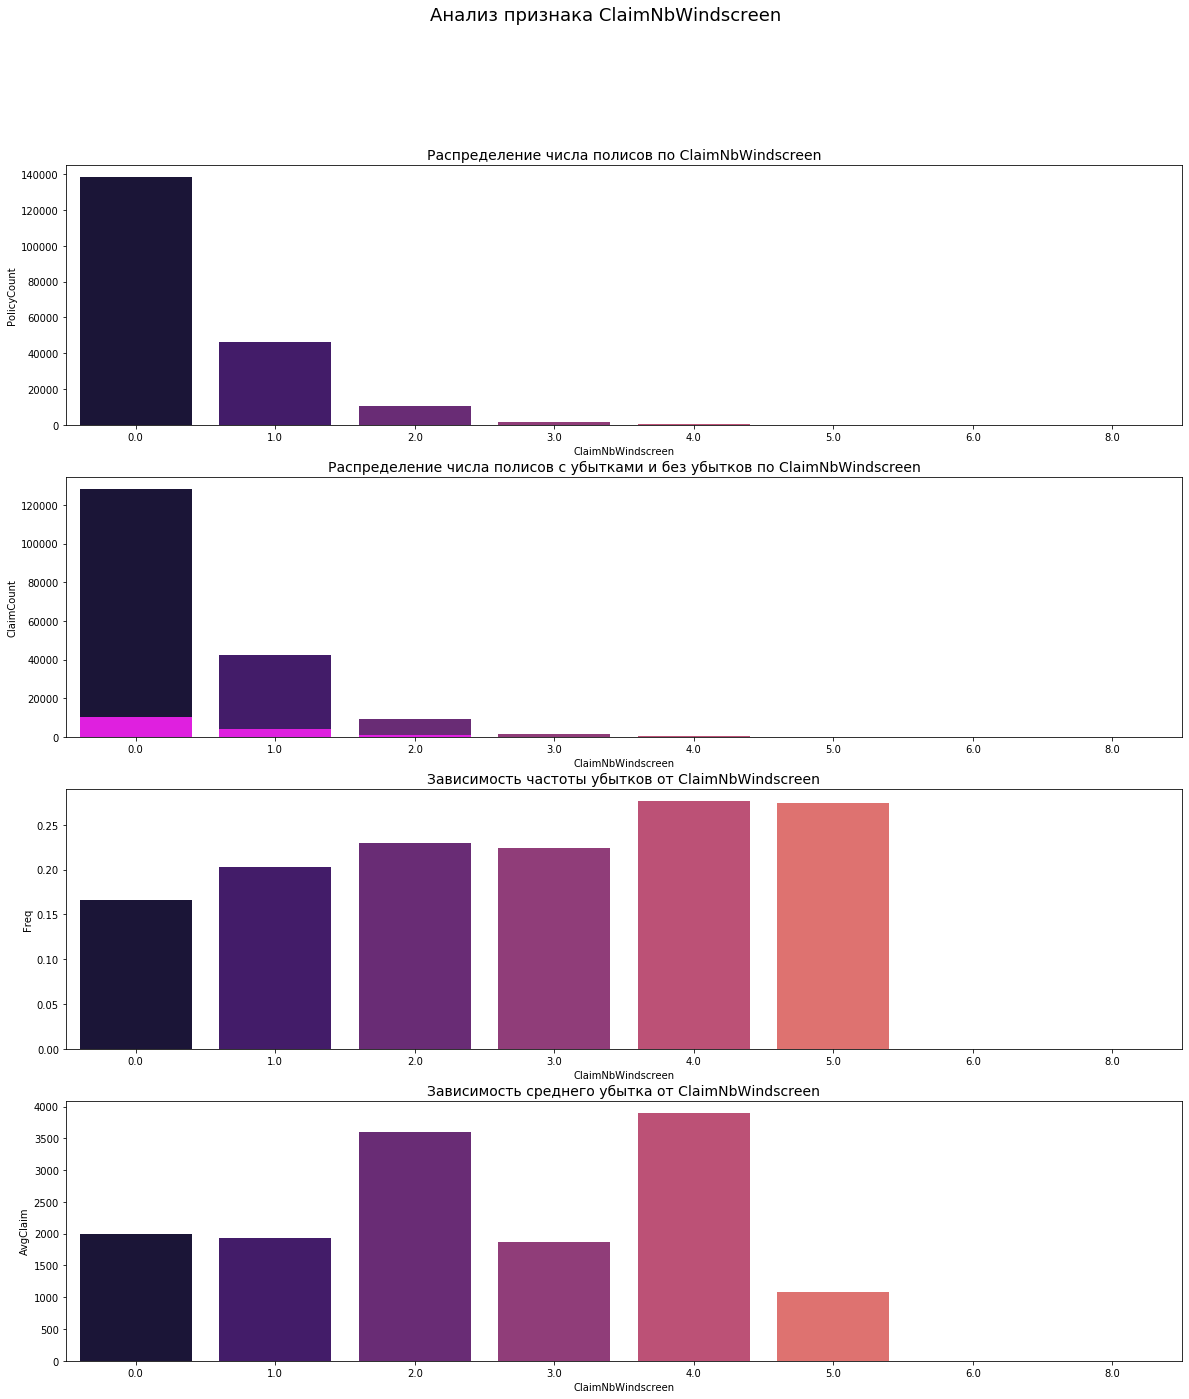

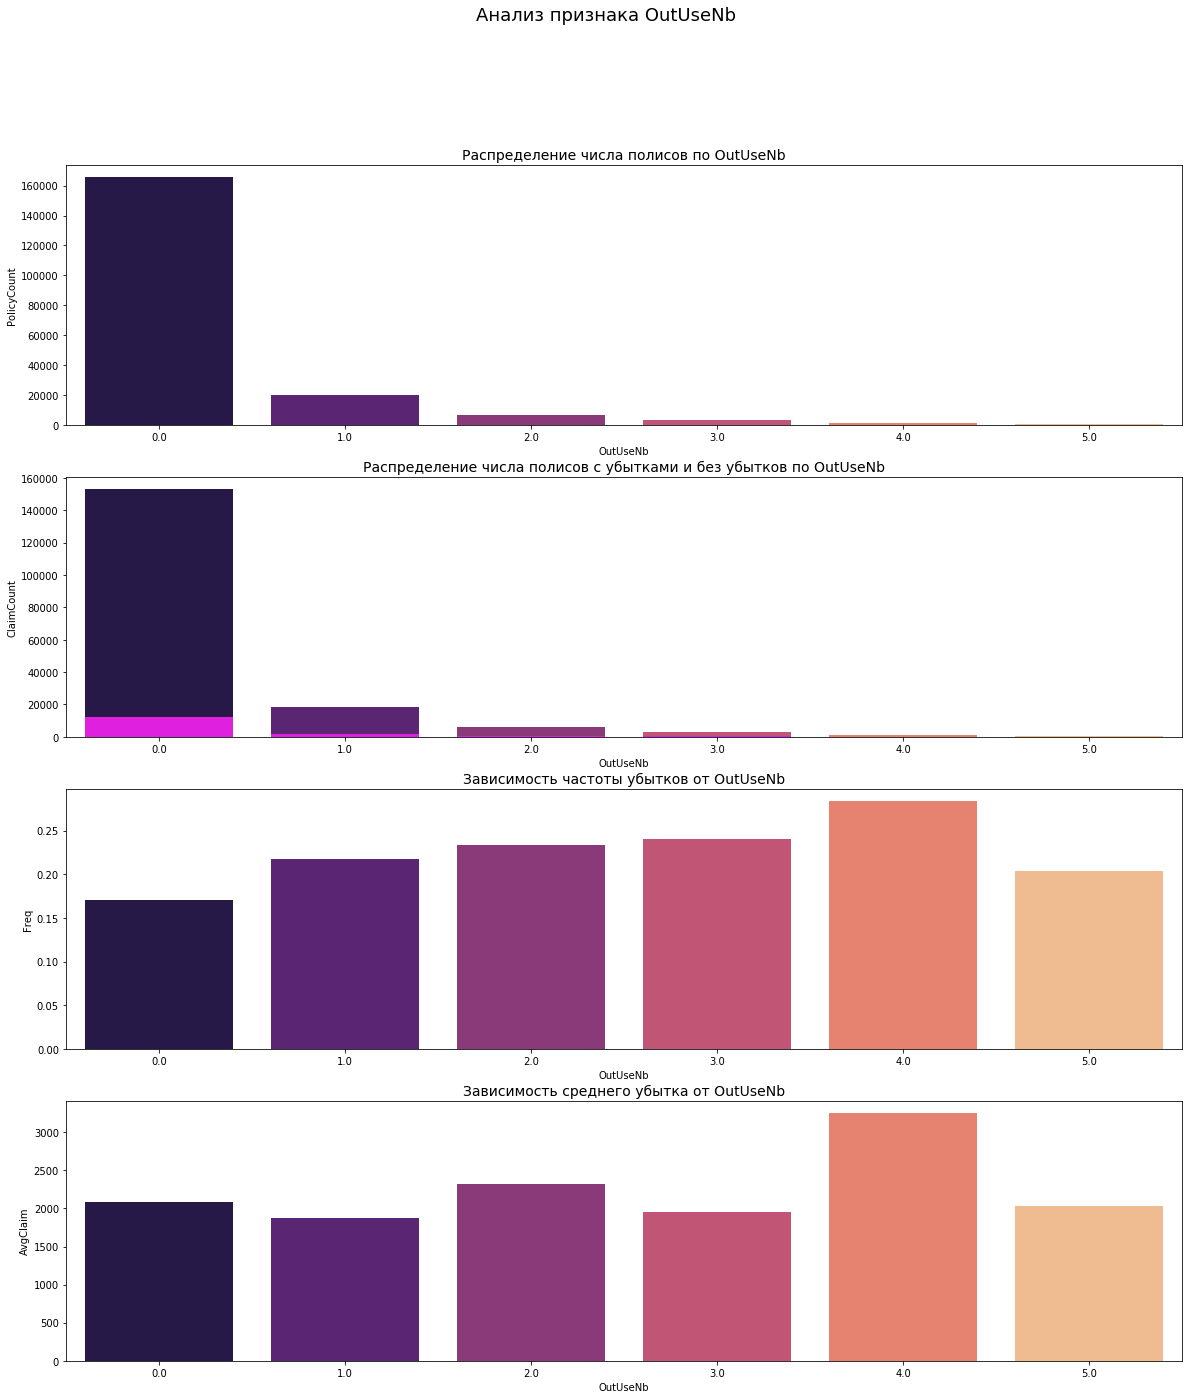

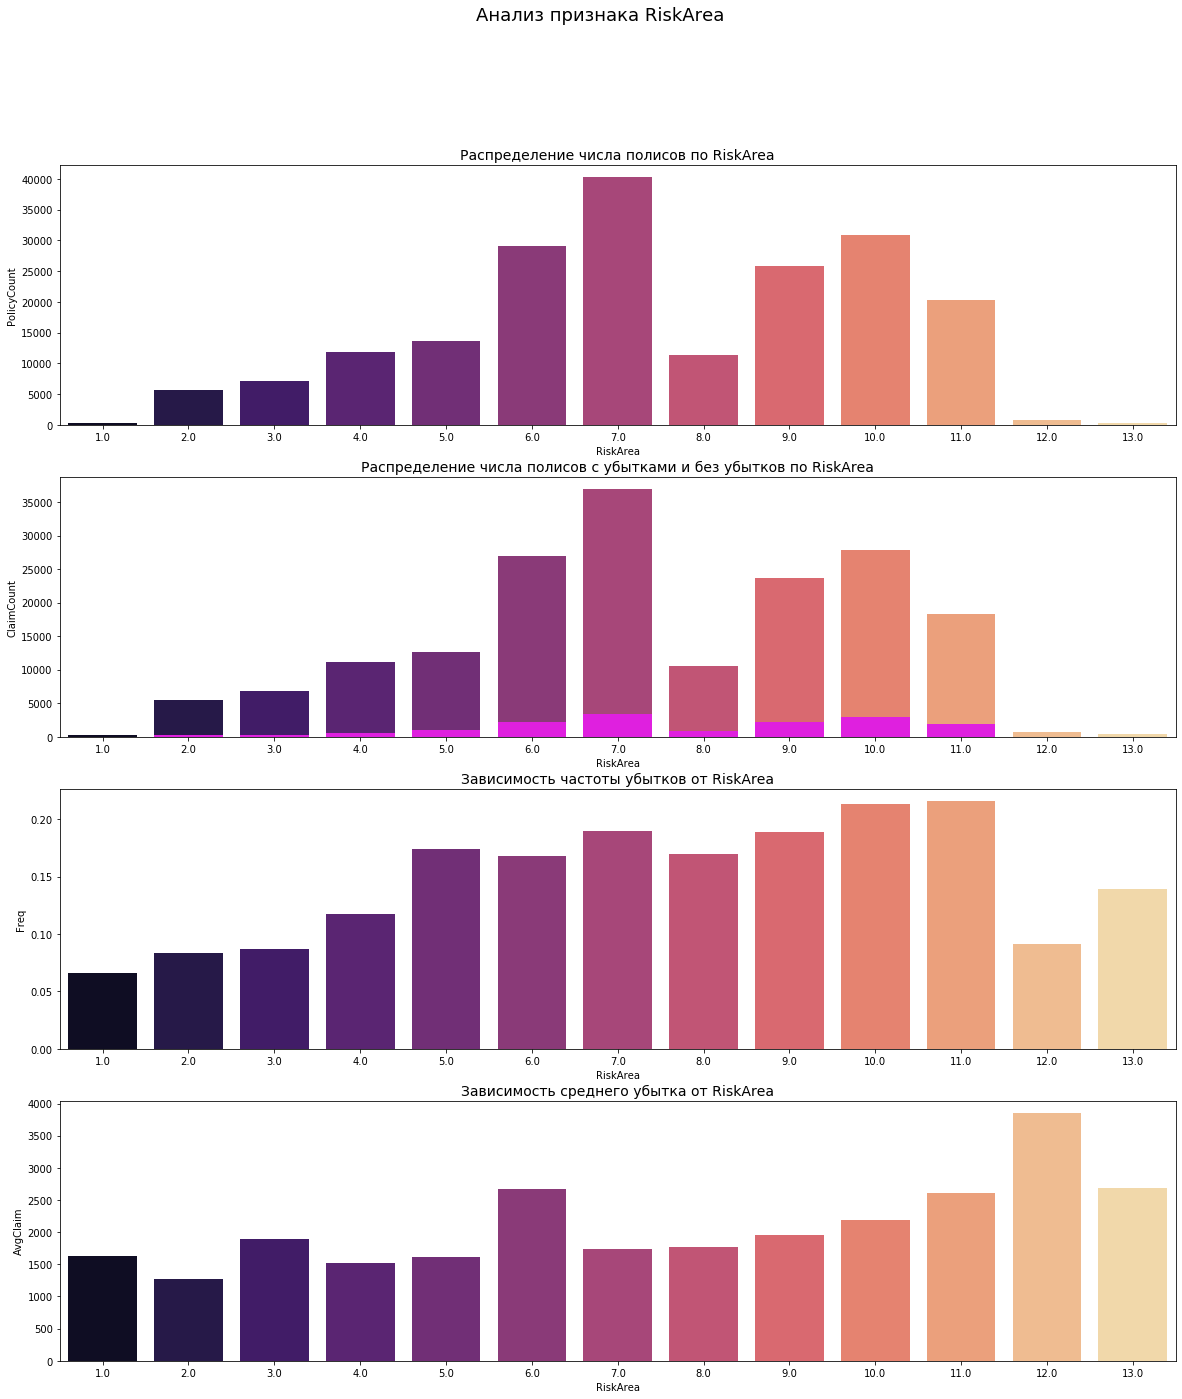

In [175]:
for feature in NUMERICAL_FEATURE_NAMES:    
    plot_feature(df, feature)

- HasKmLimit. 
- RiskVar Наибольшее количество полисов имеет признак RiskVar=15-17. При этом зависимость среднего убытока от RiskVar сглажена.
- ClaimInd ClaimInd=1 есть убыток, ClaimInd=0 - нет убытка. 
- Dataset Данные датасетах имеют равномерное распределение. 
- ClaimNbResp Наибольшее число полисов сосредоточено в ClaimNbResp=0, в них сосредоточены и основные убытки. Самый высокий средний убыток наблюдается при ClaimNbResp=3.
- ClaimNbNonResp Наибольшее число полисов сосредоточено в ClaimNbNonResp=0, в них сосредоточены и основные убытки. Самая высокая частота убытков  ClaimNbNonResp=7. Самый высокий средний убыток - при ClaimNbNonResp=3.
- ClaimNbParking. Наибольшее число полисов сосредоточено в ClaimNbParking=0 и 1, основные убытки - в ClaimNbParking=0. Самая высокая частота убытков встречается при ClaimNbParking=2, Самый высокий средний убыток - при ClaimNbParking=0.
- ClaimNbFireTheft Наибольшее число полисов в ClaimNbFireTheft=0 и 1, основные убытки - в ClaimNbFireTheft=0, остальные данные нерепрезентативны. Самая высокая частота убытков встречается при ClaimNbFireTheft=4
- ClaimNbWindscreen. Наибольшее число полисов в ClaimNbWindscreen=0 и 1, в них сосредоточены основные убытки. 
- OutUseNb Наибольшее число полисов в OutUseNb=0 и 1, основные убытки там же. Самый высокий средний убыток - при OutUseNb=4.
- RiskArea Самое большое число полисов, как и самое большое число полисов с убытками, находистя в RiskArea=7. Частота убытков растет с от меньшего значения к большему. Средний убыток растет до RiskArea=12, потом снижается при RiskArea=13.